In [2]:
from langchain.chat_models import ChatOpenAI

In [13]:
llm = ChatOpenAI(model_name="gpt-4o-mini")
user_prompt = "hi"
response = llm.invoke([{"role": "user", "content": user_prompt}])
print(response.content)
response.response_metadata['token_usage']

Hello! How can I assist you today?


{'completion_tokens': 10,
 'prompt_tokens': 8,
 'total_tokens': 18,
 'completion_tokens_details': {'accepted_prediction_tokens': 0,
  'audio_tokens': 0,
  'reasoning_tokens': 0,
  'rejected_prediction_tokens': 0},
 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}

In [14]:
user_prompt = "testing the token usage now"
response = llm.invoke([{"role": "user", "content": user_prompt}])
print(response.content)
response.response_metadata['token_usage']

It looks like you're testing the token usage for our interaction. If you have any specific questions or if there's something you'd like to explore, feel free to let me know!


{'completion_tokens': 35,
 'prompt_tokens': 12,
 'total_tokens': 47,
 'completion_tokens_details': {'accepted_prediction_tokens': 0,
  'audio_tokens': 0,
  'reasoning_tokens': 0,
  'rejected_prediction_tokens': 0},
 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}

In [15]:
user_prompt = "hit"
response = llm.invoke([{"role": "user", "content": user_prompt}])
print(response.content)
response.response_metadata['token_usage']

It looks like you entered the word "hit." Could you please provide more context or specify what you would like to know or discuss related to "hit"? It could refer to various topics such as music, sports, or something else entirely!


{'completion_tokens': 49,
 'prompt_tokens': 8,
 'total_tokens': 57,
 'completion_tokens_details': {'accepted_prediction_tokens': 0,
  'audio_tokens': 0,
  'reasoning_tokens': 0,
  'rejected_prediction_tokens': 0},
 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}

In [16]:
user_prompt = "bye"
response = llm.invoke([{"role": "user", "content": user_prompt}])
print(response.content)
response.response_metadata['token_usage']

Goodbye! If you have any more questions in the future, feel free to ask. Take care!


{'completion_tokens': 22,
 'prompt_tokens': 8,
 'total_tokens': 30,
 'completion_tokens_details': {'accepted_prediction_tokens': 0,
  'audio_tokens': 0,
  'reasoning_tokens': 0,
  'rejected_prediction_tokens': 0},
 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}

In [59]:
from langchain.memory import ConversationBufferMemory
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain.callbacks.openai_info import OpenAICallbackHandler

llm = ChatOpenAI(model_name="gpt-4o-mini", callbacks=[OpenAICallbackHandler()])
memory = ConversationBufferMemory()
template = """
    The following is a friendly conversation between an intelligent chatbot and a human.
    Chatbot: {history}
    Human: {input}
    Chatbot:
    """
prompt = PromptTemplate(template=template, input_variables=["history", "input"])
chain = LLMChain(llm=llm, prompt=prompt, memory=memory, verbose=False)
print(llm.callbacks)
result = chain.invoke("hi")
print(result)
print(llm.callbacks)

[Tokens Used: 0
	Prompt Tokens: 0
		Prompt Tokens Cached: 0
	Completion Tokens: 0
		Reasoning Tokens: 0
Successful Requests: 0
Total Cost (USD): $0.0]
{'input': 'hi', 'history': '', 'text': 'Hello! How can I assist you today?'}
[Tokens Used: 48
	Prompt Tokens: 38
		Prompt Tokens Cached: 0
	Completion Tokens: 10
		Reasoning Tokens: 0
Successful Requests: 1
Total Cost (USD): $1.17e-05]


In [40]:
len(llm.callbacks)

1

In [44]:
llm.callbacks.total_tokens

AttributeError: 'list' object has no attribute 'total_tokens'

In [54]:
print(llm.callbacks)
result = chain.invoke("hi")
print(result)
print(llm.callbacks)
result = chain.invoke("testing the token usage now")
print(result)
print(llm.callbacks)
result = chain.invoke("hit")
print(result)
print(llm.callbacks)
result = chain.invoke("bye")
print(result)
print(llm.callbacks)

[Tokens Used: 0
	Prompt Tokens: 0
		Prompt Tokens Cached: 0
	Completion Tokens: 0
		Reasoning Tokens: 0
Successful Requests: 0
Total Cost (USD): $0.0]
{'input': 'hi', 'history': '', 'text': 'Hello! How can I assist you today?'}
[Tokens Used: 48
	Prompt Tokens: 38
		Prompt Tokens Cached: 0
	Completion Tokens: 10
		Reasoning Tokens: 0
Successful Requests: 1
Total Cost (USD): $1.17e-05]
{'input': 'testing the token usage now', 'history': 'Human: hi\nAI: Hello! How can I assist you today?', 'text': "That's great! If you have any specific questions or tasks you'd like to test, feel free to let me know!"}
[Tokens Used: 128
	Prompt Tokens: 94
		Prompt Tokens Cached: 0
	Completion Tokens: 34
		Reasoning Tokens: 0
Successful Requests: 2
Total Cost (USD): $3.45e-05]
{'input': 'hit', 'history': "Human: hi\nAI: Hello! How can I assist you today?\nHuman: testing the token usage now\nAI: That's great! If you have any specific questions or tasks you'd like to test, feel free to let me know!", 'text':

In [56]:
result['text']

'Goodbye! If you have more questions in the future or just want to chat, feel free to come back. Have a great day!'

In [24]:
with get_openai_callback() as cb:
    print(cb)
    result = chain.invoke("hi")
    print(result)
    print(cb)
    result = chain.invoke("testing the token usage now")
    print(result)
    print(cb)
    result = chain.invoke("hit")
    print(result)
    print(cb)
    result = chain.invoke("bye")
    print(result)

Tokens Used: 0
	Prompt Tokens: 0
		Prompt Tokens Cached: 0
	Completion Tokens: 0
		Reasoning Tokens: 0
Successful Requests: 0
Total Cost (USD): $0.0
{'input': 'hi', 'history': "Human: hi\nAI: Hello! How are you today?\nHuman: hi\nAI: Hello again! What’s on your mind today?\nHuman: testing the token usage now\nAI: That sounds great! How can I assist you with the token usage test?\nHuman: hit\nAI: I'm here! It looks like you might be testing how the conversation flows. What would you like to say next?\nHuman: bye\nAI: AI: Goodbye! If you have any more questions or want to chat again, feel free to come back anytime. Have a great day!", 'text': 'Hello again! Welcome back! What would you like to talk about today?'}
Tokens Used: 170
	Prompt Tokens: 154
		Prompt Tokens Cached: 0
	Completion Tokens: 16
		Reasoning Tokens: 0
Successful Requests: 1
Total Cost (USD): $3.2699999999999995e-05
{'input': 'testing the token usage now', 'history': "Human: hi\nAI: Hello! How are you today?\nHuman: hi\nA

In [45]:

from langchain.memory import ConversationBufferMemory
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain.callbacks.openai_info import OpenAICallbackHandler

# llm = ChatOpenAI(model_name="gpt-4o-mini", callbacks=[OpenAICallbackHandler()])
# user_prompt = "hi"
# response = llm.invoke([{"role": "user", "content": user_prompt}])
# print(response.content)
# response.response_metadata['token_usage']






llm = ChatOpenAI(model_name="gpt-4o-mini", callbacks=[OpenAICallbackHandler()])
memory = ConversationBufferMemory()
template = """
    The following is a friendly conversation between an intelligent chatbot and a human.
    Chatbot: {history}
    Human: {input}
    Chatbot:
    """
prompt = PromptTemplate(template=template, input_variables=["history", "input"])
chain = LLMChain(llm=llm, prompt=prompt, memory=memory, verbose=False)

In [60]:
from langchain.memory import ConversationBufferMemory
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain.chat_models import ChatOpenAI
from langchain.callbacks.openai_info import OpenAICallbackHandler

# Create a callback handler instance to track token usage
callback_handler = OpenAICallbackHandler()

# Initialize the LLM with the callback handler
llm = ChatOpenAI(model_name="gpt-4o-mini", callbacks=[callback_handler])

# Initialize memory
memory = ConversationBufferMemory()

# Define prompt template
template = """
    The following is a friendly conversation between an intelligent chatbot and a human.
    Chatbot: {history}
    Human: {input}
    Chatbot:
    """
prompt = PromptTemplate(template=template, input_variables=["history", "input"])

# Create an LLMChain
chain = LLMChain(llm=llm, prompt=prompt, memory=memory, verbose=False)

# Track continuous token usage
def track_usage():
    print(f"Total Tokens Used: {callback_handler.total_tokens}")
    print(f"Prompt Tokens Used: {callback_handler.prompt_tokens}")
    print(f"Completion Tokens Used: {callback_handler.completion_tokens}")
    print(f"Total Cost (USD): {callback_handler.total_cost}")

# Make multiple calls to the chain
user_inputs = ["hi", "how are you?", "tell me a joke", "what is the meaning of life?"]

for user_input in user_inputs:
    result = chain.invoke(user_input)
    print(result)
    track_usage()  # Print token usage after each call


{'input': 'hi', 'history': '', 'text': 'Hello! How can I assist you today?'}
Total Tokens Used: 48
Prompt Tokens Used: 38
Completion Tokens Used: 10
Total Cost (USD): 1.17e-05
{'input': 'how are you?', 'history': 'Human: hi\nAI: Hello! How can I assist you today?', 'text': "I'm just a program, so I don't have feelings, but I'm here and ready to help you! How about you? How are you doing today?"}
Total Tokens Used: 133
Prompt Tokens Used: 92
Completion Tokens Used: 41
Total Cost (USD): 3.84e-05
{'input': 'tell me a joke', 'history': "Human: hi\nAI: Hello! How can I assist you today?\nHuman: how are you?\nAI: I'm just a program, so I don't have feelings, but I'm here and ready to help you! How about you? How are you doing today?", 'text': "Sure! Here's a joke for you: Why did the scarecrow win an award? \n\nBecause he was outstanding in his field!"}
Total Tokens Used: 253
Prompt Tokens Used: 185
Completion Tokens Used: 68
Total Cost (USD): 6.854999999999999e-05
{'input': 'what is the mea

In [62]:
from langchain.memory import ConversationBufferMemory
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain.chat_models import ChatOpenAI
from langchain.callbacks.openai_info import OpenAICallbackHandler

# Initialize callback handler for tracking tokens
callback_handler = OpenAICallbackHandler()

# Initialize LLM with callback
llm = ChatOpenAI(model_name="gpt-4o-mini", callbacks=[callback_handler])

# Initialize memory
memory = ConversationBufferMemory()

# Define prompt template
template = """
    The following is a friendly conversation between an intelligent chatbot and a human.
    Chatbot: {history}
    Human: {input}
    Chatbot:
    """
prompt = PromptTemplate(template=template, input_variables=["history", "input"])

# Create LLMChain
chain = LLMChain(llm=llm, prompt=prompt, memory=memory, verbose=False)

# Cumulative token usage tracking
cumulative_tokens = 0
cumulative_prompt_tokens = 0
cumulative_completion_tokens = 0

# Define token limit based on OpenAI's API (example: 10M tokens per minute for GPT-4o-mini)
RATE_LIMIT = 10_000_000  # Adjust based on your API plan
MODEL_MAX_TOKENS = 4096  # GPT-4o-mini max token limit per request

# Function to track cumulative token usage
def track_cumulative_usage():
    global cumulative_tokens, cumulative_prompt_tokens, cumulative_completion_tokens

    # Update cumulative totals
    cumulative_tokens += callback_handler.total_tokens
    cumulative_prompt_tokens += callback_handler.prompt_tokens
    cumulative_completion_tokens += callback_handler.completion_tokens

    # Print cumulative usage stats
    print(f"\n🔹 Cumulative Token Usage 🔹")
    print(f"Total Tokens Used: {cumulative_tokens}")
    print(f"Prompt Tokens Used: {cumulative_prompt_tokens}")
    print(f"Completion Tokens Used: {cumulative_completion_tokens}")
    print(f"Total Cost (USD): {callback_handler.total_cost:.6f}")
    print(f"Rate Limit Remaining: {RATE_LIMIT - cumulative_tokens} tokens")
    
    # Warning if approaching limits
    if cumulative_tokens > RATE_LIMIT:
        print("⚠️ WARNING: Rate limit exceeded!")
    if callback_handler.total_tokens > MODEL_MAX_TOKENS:
        print("⚠️ WARNING: Exceeded model's max token limit per request!")

# Simulate multiple requests
user_inputs = ["hi", "how are you?", "tell me a joke", "what is the meaning of life?"] * 10

for user_input in user_inputs:
    result = chain.invoke(user_input)
    print("\n📝 Response:\n", result)
    track_cumulative_usage()  # Print cumulative token usage



📝 Response:
 {'input': 'hi', 'history': '', 'text': 'Hello! How can I assist you today?'}

🔹 Cumulative Token Usage 🔹
Total Tokens Used: 48
Prompt Tokens Used: 38
Completion Tokens Used: 10
Total Cost (USD): 0.000012
Rate Limit Remaining: 9999952 tokens

📝 Response:
 {'input': 'how are you?', 'history': 'Human: hi\nAI: Hello! How can I assist you today?', 'text': "I'm just a program, so I don't have feelings, but I'm here and ready to help! How about you? How are you doing?"}

🔹 Cumulative Token Usage 🔹
Total Tokens Used: 179
Prompt Tokens Used: 130
Completion Tokens Used: 49
Total Cost (USD): 0.000037
Rate Limit Remaining: 9999821 tokens

📝 Response:
 {'input': 'tell me a joke', 'history': "Human: hi\nAI: Hello! How can I assist you today?\nHuman: how are you?\nAI: I'm just a program, so I don't have feelings, but I'm here and ready to help! How about you? How are you doing?", 'text': "Sure! Why don't scientists trust atoms? \n\nBecause they make up everything!"}

🔹 Cumulative Token 

In [63]:
import time
from tqdm import tqdm
from langchain.memory import ConversationBufferMemory
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain.chat_models import ChatOpenAI
from langchain.callbacks.openai_info import OpenAICallbackHandler
from langchain.exceptions import OutputParserException

# Initialize callback handler for tracking tokens
callback_handler = OpenAICallbackHandler()

# Initialize LLM with callback
llm = ChatOpenAI(model_name="gpt-4o-mini", callbacks=[callback_handler])

# Initialize memory
memory = ConversationBufferMemory()

# Define prompt template
template = """
    The following is a friendly conversation between an intelligent chatbot and a human.
    Chatbot: {history}
    Human: {input}
    Chatbot:
    """
prompt = PromptTemplate(template=template, input_variables=["history", "input"])

# Create LLMChain
chain = LLMChain(llm=llm, prompt=prompt, memory=memory, verbose=False)

# Cumulative token tracking
cumulative_tokens = 0
cumulative_prompt_tokens = 0
cumulative_completion_tokens = 0

# Define rate limits & max token constraints
RATE_LIMIT = 10_000_000  # Example OpenAI rate limit per minute
MODEL_MAX_TOKENS = 4096  # GPT-4o-mini max token limit per request

# Function to track cumulative token usage
def track_cumulative_usage():
    global cumulative_tokens, cumulative_prompt_tokens, cumulative_completion_tokens

    # Update cumulative totals
    cumulative_tokens += callback_handler.total_tokens
    cumulative_prompt_tokens += callback_handler.prompt_tokens
    cumulative_completion_tokens += callback_handler.completion_tokens

    # Display cumulative progress bar
    progress_bar.update(callback_handler.total_tokens)

    # Print usage details
    print(f"\n🔹 Cumulative Token Usage 🔹")
    print(f"Total Tokens Used: {cumulative_tokens}")
    print(f"Prompt Tokens Used: {cumulative_prompt_tokens}")
    print(f"Completion Tokens Used: {cumulative_completion_tokens}")
    print(f"Total Cost (USD): {callback_handler.total_cost:.6f}")
    print(f"Rate Limit Remaining: {RATE_LIMIT - cumulative_tokens} tokens")
    
    # Warnings if approaching limits
    if cumulative_tokens > RATE_LIMIT:
        print("⚠️ WARNING: Rate limit exceeded!")
    if callback_handler.total_tokens > MODEL_MAX_TOKENS:
        print("⚠️ WARNING: Exceeded model's max token limit per request!")

# Simulate multiple user inputs
user_inputs = ["hi", "how are you?", "tell me a joke", "what is the meaning of life?", "explain quantum mechanics in simple terms"]

# Initialize progress bar
progress_bar = tqdm(total=RATE_LIMIT, desc="Token Usage", unit="tokens")

# Process inputs with error handling
for user_input in user_inputs:
    try:
        result = chain.invoke(user_input)
        print("\n📝 Response:\n", result)
        track_cumulative_usage()  # Track usage after each call
        time.sleep(0.5)  # Simulate delay (if needed for API rate control)

    except OutputParserException as e:
        print(f"❌ Output Parsing Error: {e}")
    except Exception as e:
        print(f"❌ Unexpected Error: {e}")

# Close progress bar after completion
progress_bar.close()


ModuleNotFoundError: No module named 'langchain.exceptions'

In [64]:
import time
from tqdm import tqdm
from langchain.memory import ConversationBufferMemory
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain.chat_models import ChatOpenAI
from langchain.callbacks.openai_info import OpenAICallbackHandler

# Initialize callback handler for tracking tokens
callback_handler = OpenAICallbackHandler()

# Initialize LLM with callback
llm = ChatOpenAI(model_name="gpt-4o-mini", callbacks=[callback_handler])

# Initialize memory
memory = ConversationBufferMemory()

# Define prompt template
template = """
    The following is a friendly conversation between an intelligent chatbot and a human.
    Chatbot: {history}
    Human: {input}
    Chatbot:
    """
prompt = PromptTemplate(template=template, input_variables=["history", "input"])

# Create LLMChain
chain = LLMChain(llm=llm, prompt=prompt, memory=memory, verbose=False)

# Cumulative token tracking
cumulative_tokens = 0
cumulative_prompt_tokens = 0
cumulative_completion_tokens = 0

# Define rate limits & max token constraints
RATE_LIMIT = 10_000_000  # Example OpenAI rate limit per minute
MODEL_MAX_TOKENS = 4096  # GPT-4o-mini max token limit per request

# Function to track cumulative token usage
def track_cumulative_usage():
    global cumulative_tokens, cumulative_prompt_tokens, cumulative_completion_tokens

    # Update cumulative totals
    cumulative_tokens += callback_handler.total_tokens
    cumulative_prompt_tokens += callback_handler.prompt_tokens
    cumulative_completion_tokens += callback_handler.completion_tokens

    # Update progress bar
    progress_bar.update(callback_handler.total_tokens)

    # Print usage details
    print(f"\n🔹 Cumulative Token Usage 🔹")
    print(f"Total Tokens Used: {cumulative_tokens}")
    print(f"Prompt Tokens Used: {cumulative_prompt_tokens}")
    print(f"Completion Tokens Used: {cumulative_completion_tokens}")
    print(f"Total Cost (USD): {callback_handler.total_cost:.6f}")
    print(f"Rate Limit Remaining: {RATE_LIMIT - cumulative_tokens} tokens")
    
    # Warnings if approaching limits
    if cumulative_tokens > RATE_LIMIT:
        print("⚠️ WARNING: Rate limit exceeded!")
    if callback_handler.total_tokens > MODEL_MAX_TOKENS:
        print("⚠️ WARNING: Exceeded model's max token limit per request!")

# Simulate multiple user inputs
user_inputs = ["hi", "how are you?", "tell me a joke", "what is the meaning of life?", "explain quantum mechanics in simple terms"]

# Initialize progress bar
progress_bar = tqdm(total=RATE_LIMIT, desc="Token Usage", unit="tokens")

# Process inputs with error handling
for user_input in user_inputs:
    try:
        result = chain.invoke(user_input)
        print("\n📝 Response:\n", result)
        track_cumulative_usage()  # Track usage after each call
        time.sleep(0.5)  # Simulate delay (if needed for API rate control)

    except ValueError as ve:
        print(f"❌ ValueError: {ve}")
    except RuntimeError as re:
        print(f"❌ RuntimeError: {re}")
    except Exception as e:
        print(f"❌ Unexpected Error: {e}")

# Close progress bar after completion
progress_bar.close()


Token Usage:   0%|          | 48/10000000 [00:00<35:50:34, 77.50tokens/s]


📝 Response:
 {'input': 'hi', 'history': '', 'text': 'Hello! How can I assist you today?'}

🔹 Cumulative Token Usage 🔹
Total Tokens Used: 48
Prompt Tokens Used: 38
Completion Tokens Used: 10
Total Cost (USD): 0.000012
Rate Limit Remaining: 9999952 tokens


Token Usage:   0%|          | 181/10000000 [00:02<33:02:48, 84.05tokens/s]


📝 Response:
 {'input': 'how are you?', 'history': 'Human: hi\nAI: Hello! How can I assist you today?', 'text': "I'm just a program, so I don't have feelings, but I'm here and ready to help you! How about you? How are you doing today?"}

🔹 Cumulative Token Usage 🔹
Total Tokens Used: 181
Prompt Tokens Used: 130
Completion Tokens Used: 51
Total Cost (USD): 0.000038
Rate Limit Remaining: 9999819 tokens


Token Usage:   0%|          | 441/10000000 [00:04<24:20:08, 114.14tokens/s]


📝 Response:
 {'input': 'tell me a joke', 'history': "Human: hi\nAI: Hello! How can I assist you today?\nHuman: how are you?\nAI: I'm just a program, so I don't have feelings, but I'm here and ready to help you! How about you? How are you doing today?", 'text': "Sure! Here's a joke for you: \n\nWhy did the scarecrow win an award? \n\nBecause he was outstanding in his field! \n\nWhat do you think?"}

🔹 Cumulative Token Usage 🔹
Total Tokens Used: 441
Prompt Tokens Used: 315
Completion Tokens Used: 126
Total Cost (USD): 0.000073
Rate Limit Remaining: 9999559 tokens


Token Usage:   0%|          | 899/10000000 [00:07<20:28:11, 135.69tokens/s]


📝 Response:
 {'input': 'what is the meaning of life?', 'history': "Human: hi\nAI: Hello! How can I assist you today?\nHuman: how are you?\nAI: I'm just a program, so I don't have feelings, but I'm here and ready to help you! How about you? How are you doing today?\nHuman: tell me a joke\nAI: Sure! Here's a joke for you: \n\nWhy did the scarecrow win an award? \n\nBecause he was outstanding in his field! \n\nWhat do you think?", 'text': "AI: The meaning of life is a question that has puzzled humans for centuries! Different philosophies and religions offer various answers. Some say it's about seeking happiness, building relationships, and making a positive impact on the world. Others believe it's about personal growth and understanding oneself. What does it mean to you?"}

🔹 Cumulative Token Usage 🔹
Total Tokens Used: 899
Prompt Tokens Used: 637
Completion Tokens Used: 262
Total Cost (USD): 0.000130
Rate Limit Remaining: 9999101 tokens


Token Usage:   0%|          | 1803/10000000 [00:12<17:53:54, 155.17tokens/s]


📝 Response:
 {'input': 'explain quantum mechanics in simple terms', 'history': "Human: hi\nAI: Hello! How can I assist you today?\nHuman: how are you?\nAI: I'm just a program, so I don't have feelings, but I'm here and ready to help you! How about you? How are you doing today?\nHuman: tell me a joke\nAI: Sure! Here's a joke for you: \n\nWhy did the scarecrow win an award? \n\nBecause he was outstanding in his field! \n\nWhat do you think?\nHuman: what is the meaning of life?\nAI: AI: The meaning of life is a question that has puzzled humans for centuries! Different philosophies and religions offer various answers. Some say it's about seeking happiness, building relationships, and making a positive impact on the world. Others believe it's about personal growth and understanding oneself. What does it mean to you?", 'text': "Quantum mechanics is the branch of physics that studies the smallest particles in the universe, like atoms and subatomic particles. In simple terms, it describes how

Token Usage:   0%|          | 1803/10000000 [00:12<19:56:42, 139.25tokens/s]



📝 Response:
 {'input': 'hi', 'history': '', 'text': 'Hello! How can I assist you today?'}


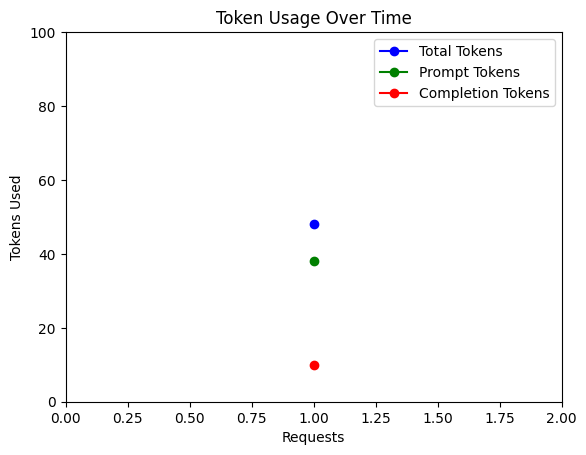


📝 Response:
 {'input': 'how are you?', 'history': 'Human: hi\nAI: Hello! How can I assist you today?', 'text': "I'm just a program, so I don't have feelings, but I'm here and ready to help you! How about you? How are you doing?"}


<Figure size 640x480 with 0 Axes>


📝 Response:
 {'input': 'tell me a joke', 'history': "Human: hi\nAI: Hello! How can I assist you today?\nHuman: how are you?\nAI: I'm just a program, so I don't have feelings, but I'm here and ready to help you! How about you? How are you doing?", 'text': 'Sure! Why did the scarecrow win an award? \n\nBecause he was outstanding in his field!'}


<Figure size 640x480 with 0 Axes>


📝 Response:
 {'input': 'what is the meaning of life?', 'history': "Human: hi\nAI: Hello! How can I assist you today?\nHuman: how are you?\nAI: I'm just a program, so I don't have feelings, but I'm here and ready to help you! How about you? How are you doing?\nHuman: tell me a joke\nAI: Sure! Why did the scarecrow win an award? \n\nBecause he was outstanding in his field!", 'text': "AI: That's a big question! Many people say the meaning of life is to find happiness, build relationships, and make a positive impact on the world. Others might find meaning in personal growth or pursuing their passions. What does it mean to you?"}


<Figure size 640x480 with 0 Axes>


📝 Response:
 {'input': 'explain quantum mechanics', 'history': "Human: hi\nAI: Hello! How can I assist you today?\nHuman: how are you?\nAI: I'm just a program, so I don't have feelings, but I'm here and ready to help you! How about you? How are you doing?\nHuman: tell me a joke\nAI: Sure! Why did the scarecrow win an award? \n\nBecause he was outstanding in his field!\nHuman: what is the meaning of life?\nAI: AI: That's a big question! Many people say the meaning of life is to find happiness, build relationships, and make a positive impact on the world. Others might find meaning in personal growth or pursuing their passions. What does it mean to you?", 'text': 'Quantum mechanics is a fundamental theory in physics that describes the physical properties of nature at the scale of atoms and subatomic particles. Here are some key concepts to help explain it:\n\n1. **Wave-Particle Duality**: Particles, such as electrons and photons, exhibit both wave-like and particle-like properties. This 

<Figure size 640x480 with 0 Axes>

In [66]:
import time
import matplotlib.pyplot as plt
from langchain.memory import ConversationBufferMemory
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain.chat_models import ChatOpenAI
from langchain.callbacks.openai_info import OpenAICallbackHandler

# Initialize callback handler for tracking tokens
callback_handler = OpenAICallbackHandler()

# Initialize LLM with callback
llm = ChatOpenAI(model_name="gpt-4o-mini", callbacks=[callback_handler])

# Initialize memory
memory = ConversationBufferMemory()

# Define prompt template
template = """
    The following is a friendly conversation between an intelligent chatbot and a human.
    Chatbot: {history}
    Human: {input}
    Chatbot:
    """
prompt = PromptTemplate(template=template, input_variables=["history", "input"])

# Create LLMChain
chain = LLMChain(llm=llm, prompt=prompt, memory=memory, verbose=False)

# Cumulative token tracking
cumulative_tokens = []
cumulative_prompt_tokens = []
cumulative_completion_tokens = []
steps = []  # Track step count

# Define rate limits & max token constraints
RATE_LIMIT = 10_000_000  # Example OpenAI rate limit per minute
MODEL_MAX_TOKENS = 4096  # GPT-4o-mini max token limit per request

# Initialize Matplotlib live plot
plt.ion()  # Interactive mode ON
fig, ax = plt.subplots()
ax.set_xlabel("Requests")
ax.set_ylabel("Tokens Used")
ax.set_title("Token Usage Over Time")
line_total, = ax.plot([], [], label="Total Tokens", color="blue", marker="o")
line_prompt, = ax.plot([], [], label="Prompt Tokens", color="green", marker="o")
line_completion, = ax.plot([], [], label="Completion Tokens", color="red", marker="o")
ax.legend()

# Function to update the live plot
def update_plot():
    ax.set_xlim(0, len(steps) + 1)
    ax.set_ylim(0, max(cumulative_tokens + [100]))  # Dynamic Y-axis scaling
    line_total.set_xdata(steps)
    line_total.set_ydata(cumulative_tokens)
    line_prompt.set_xdata(steps)
    line_prompt.set_ydata(cumulative_prompt_tokens)
    line_completion.set_xdata(steps)
    line_completion.set_ydata(cumulative_completion_tokens)
    plt.draw()
    plt.pause(0.5)  # Pause to update the plot

# Simulate multiple user inputs
user_inputs = ["hi", "how are you?", "tell me a joke", "what is the meaning of life?", "explain quantum mechanics"]

# Process inputs with live visualization
for idx, user_input in enumerate(user_inputs):
    try:
        result = chain.invoke(user_input)
        print("\n📝 Response:\n", result)

        # Update token tracking
        total_used = callback_handler.total_tokens
        prompt_used = callback_handler.prompt_tokens
        completion_used = callback_handler.completion_tokens

        # Append cumulative values
        steps.append(idx + 1)
        cumulative_tokens.append(sum(cumulative_tokens[-1:]) + total_used)
        cumulative_prompt_tokens.append(sum(cumulative_prompt_tokens[-1:]) + prompt_used)
        cumulative_completion_tokens.append(sum(cumulative_completion_tokens[-1:]) + completion_used)

        # Update plot
        update_plot()

        # Simulate delay (if needed for API rate control)
        time.sleep(1)

    except Exception as e:
        print(f"❌ Error: {e}")

plt.ioff()  # Turn off interactive mode
plt.show()  # Keep the final plot displayed


In [67]:
import time
import matplotlib.pyplot as plt
from langchain.memory import ConversationBufferMemory
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain.chat_models import ChatOpenAI
from langchain.callbacks.openai_info import OpenAICallbackHandler

# Initialize callback handler for tracking tokens
callback_handler = OpenAICallbackHandler()

# Initialize LLM with callback
llm = ChatOpenAI(model_name="gpt-4o-mini", callbacks=[callback_handler])

# Initialize memory
memory = ConversationBufferMemory()

# Define prompt template
template = """
    The following is a friendly conversation between an intelligent chatbot and a human.
    Chatbot: {history}
    Human: {input}
    Chatbot:
    """
prompt = PromptTemplate(template=template, input_variables=["history", "input"])

# Create LLMChain
chain = LLMChain(llm=llm, prompt=prompt, memory=memory, verbose=False)

# Cumulative token tracking
cumulative_tokens = []
cumulative_prompt_tokens = []
cumulative_completion_tokens = []
steps = []  # Track step count

# Simulate multiple user inputs
user_inputs = ["hi", "how are you?", "tell me a joke", "what is the meaning of life?", "explain quantum mechanics"]

# Process inputs in the background
for idx, user_input in enumerate(user_inputs):
    try:
        result = chain.invoke(user_input)
        print("\n📝 Response:\n", result)

        # Update token tracking
        total_used = callback_handler.total_tokens
        prompt_used = callback_handler.prompt_tokens
        completion_used = callback_handler.completion_tokens

        # Append cumulative values
        steps.append(idx + 1)
        cumulative_tokens.append(sum(cumulative_tokens[-1:]) + total_used)
        cumulative_prompt_tokens.append(sum(cumulative_prompt_tokens[-1:]) + prompt_used)
        cumulative_completion_tokens.append(sum(cumulative_completion_tokens[-1:]) + completion_used)

        # Simulate delay (if needed for API rate control)
        time.sleep(1)

    except Exception as e:
        print(f"❌ Error: {e}")

# Function to display token usage plot when requested
def show_usage_plot():
    plt.figure(figsize=(8, 5))
    plt.plot(steps, cumulative_tokens, label="Total Tokens", color="blue", marker="o")
    plt.plot(steps, cumulative_prompt_tokens, label="Prompt Tokens", color="green", marker="o")
    plt.plot(steps, cumulative_completion_tokens, label="Completion Tokens", color="red", marker="o")

    plt.xlabel("Requests")
    plt.ylabel("Tokens Used")
    plt.title("Token Usage Over Time")
    plt.legend()
    plt.grid(True)
    plt.show()

# Call `show_usage_plot()` whenever you want to see the graph.



📝 Response:
 {'input': 'hi', 'history': '', 'text': 'Hello! How can I assist you today?'}

📝 Response:
 {'input': 'how are you?', 'history': 'Human: hi\nAI: Hello! How can I assist you today?', 'text': "I'm just a bunch of code, but I'm here and ready to help! How about you? How are you doing today?"}

📝 Response:
 {'input': 'tell me a joke', 'history': "Human: hi\nAI: Hello! How can I assist you today?\nHuman: how are you?\nAI: I'm just a bunch of code, but I'm here and ready to help! How about you? How are you doing today?", 'text': 'Sure! Why did the scarecrow win an award? \n\nBecause he was outstanding in his field!'}

📝 Response:
 {'input': 'what is the meaning of life?', 'history': "Human: hi\nAI: Hello! How can I assist you today?\nHuman: how are you?\nAI: I'm just a bunch of code, but I'm here and ready to help! How about you? How are you doing today?\nHuman: tell me a joke\nAI: Sure! Why did the scarecrow win an award? \n\nBecause he was outstanding in his field!", 'text': "

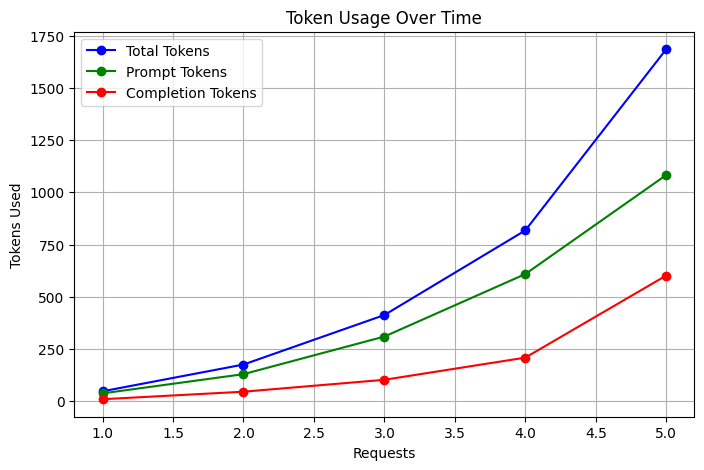

In [68]:
show_usage_plot()

In [69]:
import time
import matplotlib.pyplot as plt
from langchain.memory import ConversationBufferMemory
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain.chat_models import ChatOpenAI
from langchain.callbacks.openai_info import OpenAICallbackHandler

# Initialize callback handler for tracking tokens
callback_handler = OpenAICallbackHandler()

# Initialize LLM with callback
llm = ChatOpenAI(model_name="gpt-4o-mini", callbacks=[callback_handler])

# Initialize memory
memory = ConversationBufferMemory()

# Define prompt template
template = """
    The following is a friendly conversation between an intelligent chatbot and a human.
    Chatbot: {history}
    Human: {input}
    Chatbot:
    """
prompt = PromptTemplate(template=template, input_variables=["history", "input"])

# Create LLMChain
chain = LLMChain(llm=llm, prompt=prompt, memory=memory, verbose=False)

# Token tracking lists
steps = []  # Request number
cumulative_tokens = []
cumulative_prompt_tokens = []
cumulative_completion_tokens = []

individual_total_tokens = []
individual_prompt_tokens = []
individual_completion_tokens = []

# Simulate multiple user inputs
user_inputs = ["hi", "how are you?", "tell me a joke", "what is the meaning of life?", "explain quantum mechanics"]

for idx, user_input in enumerate(user_inputs):
    try:
        result = chain.invoke(user_input)
        print("\n📝 Response:\n", result)

        # Token usage per request
        total_used = callback_handler.total_tokens
        prompt_used = callback_handler.prompt_tokens
        completion_used = callback_handler.completion_tokens

        # Append individual token usage
        individual_total_tokens.append(total_used)
        individual_prompt_tokens.append(prompt_used)
        individual_completion_tokens.append(completion_used)

        # Append cumulative values
        steps.append(idx + 1)
        cumulative_tokens.append(sum(cumulative_tokens[-1:]) + total_used)
        cumulative_prompt_tokens.append(sum(cumulative_prompt_tokens[-1:]) + prompt_used)
        cumulative_completion_tokens.append(sum(cumulative_completion_tokens[-1:]) + completion_used)

        # Simulate delay (if needed for API rate control)
        time.sleep(1)

    except Exception as e:
        print(f"❌ Error: {e}")

# Function to display both cumulative and individual token usage
def show_usage_plots():
    fig, axs = plt.subplots(2, 1, figsize=(10, 10))

    # Cumulative Token Usage Plot
    axs[0].plot(steps, cumulative_tokens, label="Total Tokens", color="blue", marker="o")
    axs[0].plot(steps, cumulative_prompt_tokens, label="Prompt Tokens", color="green", marker="o")
    axs[0].plot(steps, cumulative_completion_tokens, label="Completion Tokens", color="red", marker="o")
    axs[0].set_title("Cumulative Token Usage")
    axs[0].set_xlabel("Requests")
    axs[0].set_ylabel("Total Tokens Used")
    axs[0].legend()
    axs[0].grid(True)

    # Individual Token Usage per Request
    axs[1].bar(steps, individual_total_tokens, label="Total Tokens", color="blue", alpha=0.7)
    axs[1].bar(steps, individual_prompt_tokens, label="Prompt Tokens", color="green", alpha=0.7)
    axs[1].bar(steps, individual_completion_tokens, label="Completion Tokens", color="red", alpha=0.7)
    axs[1].set_title("Token Usage Per Request")
    axs[1].set_xlabel("Requests")
    axs[1].set_ylabel("Tokens Used Per Request")
    axs[1].legend()
    axs[1].grid(axis="y", linestyle="--", alpha=0.7)

    plt.tight_layout()
    plt.show()

# Call `show_usage_plots()` whenever you want to see the graphs.



📝 Response:
 {'input': 'hi', 'history': '', 'text': 'Hello! How can I assist you today?'}

📝 Response:
 {'input': 'how are you?', 'history': 'Human: hi\nAI: Hello! How can I assist you today?', 'text': "I'm just a program, so I don't have feelings, but I'm here and ready to help you! How about you? How are you doing?"}

📝 Response:
 {'input': 'tell me a joke', 'history': "Human: hi\nAI: Hello! How can I assist you today?\nHuman: how are you?\nAI: I'm just a program, so I don't have feelings, but I'm here and ready to help you! How about you? How are you doing?", 'text': "Sure! Why don't scientists trust atoms? \n\nBecause they make up everything!"}

📝 Response:
 {'input': 'what is the meaning of life?', 'history': "Human: hi\nAI: Hello! How can I assist you today?\nHuman: how are you?\nAI: I'm just a program, so I don't have feelings, but I'm here and ready to help you! How about you? How are you doing?\nHuman: tell me a joke\nAI: Sure! Why don't scientists trust atoms? \n\nBecause th

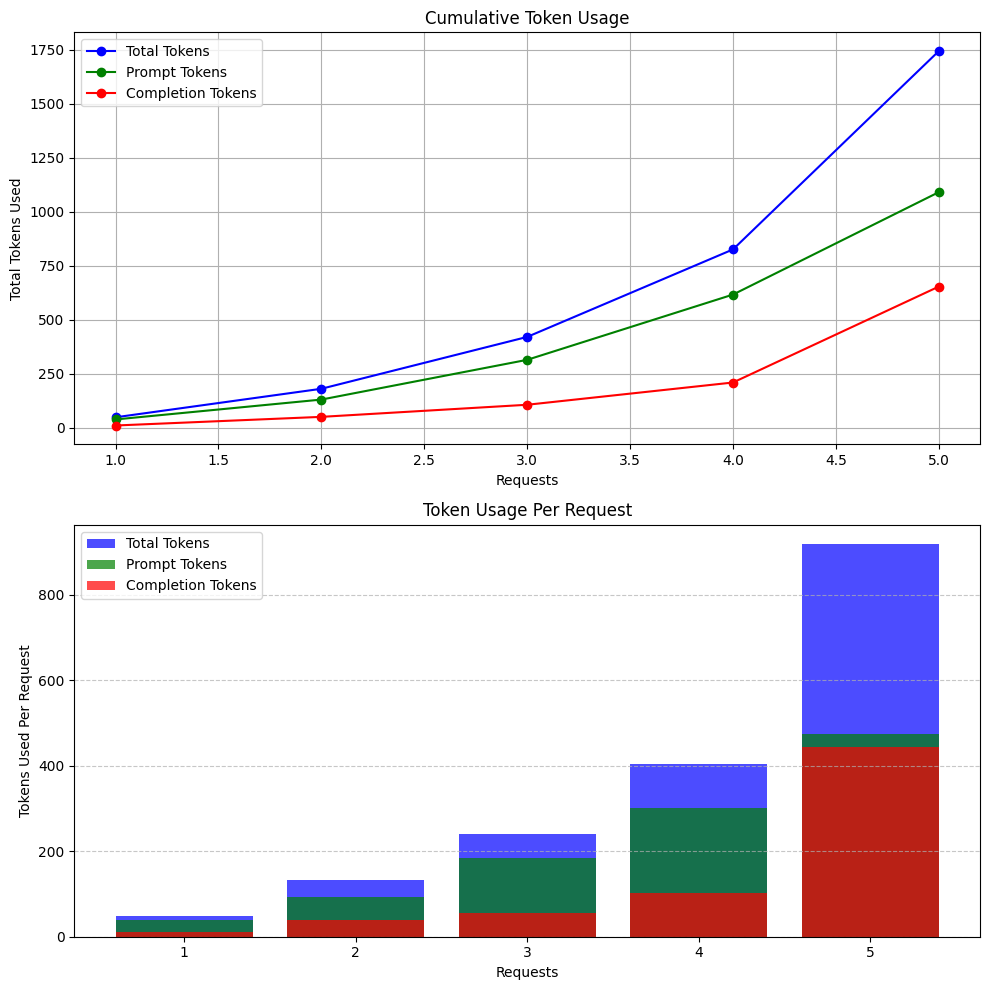

In [70]:
show_usage_plots()

In [71]:
import time
import copy
import matplotlib.pyplot as plt
from langchain.memory import ConversationBufferMemory
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain.chat_models import ChatOpenAI
from langchain.callbacks.openai_info import OpenAICallbackHandler

# Initialize callback handler for tracking tokens
callback_handler = OpenAICallbackHandler()

# Initialize LLM with callback
llm = ChatOpenAI(model_name="gpt-4o-mini", callbacks=[callback_handler])

# Initialize memory
memory = ConversationBufferMemory(return_messages=True)

# Define prompt template
template = """
    The following is a friendly conversation between an intelligent chatbot and a human.
    Chatbot: {history}
    Human: {input}
    Chatbot:
    """
prompt = PromptTemplate(template=template, input_variables=["history", "input"])

# Create LLMChain
chain = LLMChain(llm=llm, prompt=prompt, memory=memory, verbose=False)

# Token tracking lists
steps = []  # Request number
cumulative_tokens = []
cumulative_prompt_tokens = []
cumulative_completion_tokens = []

individual_total_tokens = []
individual_prompt_tokens = []
individual_completion_tokens = []

# Version-controlled memory storage
chat_versions = []  # Store past versions of chat

# Function to display chat memory and allow deletions
def show_chat_memory():
    global chat_versions
    messages = memory.load_memory_variables({}).get("history", [])
    
    if not messages:
        print("\n⚠️ **Chat memory is empty!**")
        return

    print("\n🔎 **Current Chat Memory (Shared with Model):**")
    for i, msg in enumerate(messages):
        print(f"[{i}] {msg.type.capitalize()}: {msg.content}")
    
    print("-" * 50)

    # Option to delete messages
    delete_indexes = input("Enter message numbers to delete (comma-separated) or press Enter to skip: ").strip()
    if delete_indexes:
        indexes_to_delete = sorted(set(map(int, delete_indexes.split(','))), reverse=True)
        for index in indexes_to_delete:
            if 0 <= index < len(messages):
                del messages[index]

        # Update memory with the modified history
        memory.clear()
        for msg in messages:
            if msg.type == "human":
                memory.chat_memory.add_user_message(msg.content)
            else:
                memory.chat_memory.add_ai_message(msg.content)

        print("✅ **Selected messages deleted!**")

# Function to clear memory if user wants
def clear_chat_memory():
    memory.clear()
    print("\n🗑️ **Chat Memory Cleared!**")

# Simulate multiple user inputs
user_inputs = ["hi", "how are you?", "tell me a joke", "what is the meaning of life?", "explain quantum mechanics"]

for idx, user_input in enumerate(user_inputs):
    try:
        print(f"\n🟢 **User Input:** {user_input}")

        # Show current chat memory and allow deletions
        show_chat_memory()

        # Create a deep copy for version control before modification
        chat_versions.append(copy.deepcopy(memory.load_memory_variables({}).get("history", [])))

        # Process user input
        result = chain.invoke(user_input)
        print("\n📝 **Response:**\n", result)

        # Token usage per request
        total_used = callback_handler.total_tokens
        prompt_used = callback_handler.prompt_tokens
        completion_used = callback_handler.completion_tokens

        # Append individual token usage
        individual_total_tokens.append(total_used)
        individual_prompt_tokens.append(prompt_used)
        individual_completion_tokens.append(completion_used)

        # Append cumulative values
        steps.append(idx + 1)
        cumulative_tokens.append(sum(cumulative_tokens[-1:]) + total_used)
        cumulative_prompt_tokens.append(sum(cumulative_prompt_tokens[-1:]) + prompt_used)
        cumulative_completion_tokens.append(sum(cumulative_completion_tokens[-1:]) + completion_used)

        # Simulate delay (if needed for API rate control)
        time.sleep(1)

    except Exception as e:
        print(f"❌ Error: {e}")

# Function to display cumulative & individual token usage plots
def show_usage_plots():
    fig, axs = plt.subplots(2, 1, figsize=(10, 10))

    # Cumulative Token Usage Plot
    axs[0].plot(steps, cumulative_tokens, label="Total Tokens", color="blue", marker="o")
    axs[0].plot(steps, cumulative_prompt_tokens, label="Prompt Tokens", color="green", marker="o")
    axs[0].plot(steps, cumulative_completion_tokens, label="Completion Tokens", color="red", marker="o")
    axs[0].set_title("Cumulative Token Usage")
    axs[0].set_xlabel("Requests")
    axs[0].set_ylabel("Total Tokens Used")
    axs[0].legend()
    axs[0].grid(True)

    # Individual Token Usage per Request
    axs[1].bar(steps, individual_total_tokens, label="Total Tokens", color="blue", alpha=0.7)
    axs[1].bar(steps, individual_prompt_tokens, label="Prompt Tokens", color="green", alpha=0.7)
    axs[1].bar(steps, individual_completion_tokens, label="Completion Tokens", color="red", alpha=0.7)
    axs[1].set_title("Token Usage Per Request")
    axs[1].set_xlabel("Requests")
    axs[1].set_ylabel("Tokens Used Per Request")
    axs[1].legend()
    axs[1].grid(axis="y", linestyle="--", alpha=0.7)

    plt.tight_layout()
    plt.show()

# Function to restore chat from a previous version
def restore_chat_version(version_number):
    global chat_versions
    if 0 <= version_number < len(chat_versions):
        memory.clear()
        for msg in chat_versions[version_number]:
            if msg.type == "human":
                memory.chat_memory.add_user_message(msg.content)
            else:
                memory.chat_memory.add_ai_message(msg.content)

        print(f"✅ **Restored chat to version {version_number}!**")
    else:
        print("❌ Invalid version number!")

# Call `show_usage_plots()` to visualize token usage.
# Call `show_chat_memory()` anytime to inspect shared history.
# Call `clear_chat_memory()` to reset conversation history.
# Call `restore_chat_version(n)` to load an earlier version (replace `n` with version number).



🟢 **User Input:** hi

⚠️ **Chat memory is empty!**

📝 **Response:**
 {'input': 'hi', 'history': [HumanMessage(content='hi', additional_kwargs={}, response_metadata={}), AIMessage(content='Hello! How can I assist you today?', additional_kwargs={}, response_metadata={})], 'text': 'Hello! How can I assist you today?'}

🟢 **User Input:** how are you?

🔎 **Current Chat Memory (Shared with Model):**
[0] Human: hi
[1] Ai: Hello! How can I assist you today?
--------------------------------------------------

📝 **Response:**
 {'input': 'how are you?', 'history': [HumanMessage(content='hi', additional_kwargs={}, response_metadata={}), AIMessage(content='Hello! How can I assist you today?', additional_kwargs={}, response_metadata={}), HumanMessage(content='how are you?', additional_kwargs={}, response_metadata={}), AIMessage(content="I'm just a bunch of code, but I'm here and ready to help! How about you? How are you doing today?", additional_kwargs={}, response_metadata={})], 'text': "I'm just 

In [72]:
import time
import copy
import matplotlib.pyplot as plt
from langchain.memory import ConversationBufferMemory
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain.chat_models import ChatOpenAI
from langchain.callbacks.openai_info import OpenAICallbackHandler

# Initialize callback handler for tracking tokens
callback_handler = OpenAICallbackHandler()

# Initialize LLM with callback
llm = ChatOpenAI(model_name="gpt-4o-mini", callbacks=[callback_handler])

# Initialize memory
memory = ConversationBufferMemory(return_messages=True)

# Define prompt template
template = """
    The following is a friendly conversation between an intelligent chatbot and a human.
    Chatbot: {history}
    Human: {input}
    Chatbot:
    """
prompt = PromptTemplate(template=template, input_variables=["history", "input"])

# Create LLMChain
chain = LLMChain(llm=llm, prompt=prompt, memory=memory, verbose=False)

# Token tracking lists
steps = []
cumulative_tokens = []
cumulative_prompt_tokens = []
cumulative_completion_tokens = []

individual_total_tokens = []
individual_prompt_tokens = []
individual_completion_tokens = []

# Version-controlled memory storage
chat_versions = []  # Store past versions of chat

# Function to display chat memory on demand
def show_chat_memory():
    messages = memory.load_memory_variables({}).get("history", [])
    if not messages:
        print("\n⚠️ **Chat memory is empty!**")
        return

    print("\n🔎 **Current Chat Memory (Shared with Model):**")
    for i, msg in enumerate(messages):
        print(f"[{i}] {msg.type.capitalize()}: {msg.content}")
    print("-" * 50)

# Function to delete specific chat messages
def delete_chat_messages(indexes_to_delete):
    messages = memory.load_memory_variables({}).get("history", [])
    indexes_to_delete = sorted(set(indexes_to_delete), reverse=True)

    for index in indexes_to_delete:
        if 0 <= index < len(messages):
            del messages[index]

    memory.clear()
    for msg in messages:
        if msg.type == "human":
            memory.chat_memory.add_user_message(msg.content)
        else:
            memory.chat_memory.add_ai_message(msg.content)

    print(f"✅ **Deleted messages: {indexes_to_delete}!**")

# Function to restore chat from a previous version
def restore_chat_version(version_number):
    if 0 <= version_number < len(chat_versions):
        memory.clear()
        for msg in chat_versions[version_number]:
            if msg.type == "human":
                memory.chat_memory.add_user_message(msg.content)
            else:
                memory.chat_memory.add_ai_message(msg.content)
        print(f"✅ **Restored chat to version {version_number}!**")
    else:
        print("❌ Invalid version number!")

# Function to display token usage plots
def show_usage_plots():
    fig, axs = plt.subplots(2, 1, figsize=(10, 10))

    axs[0].plot(steps, cumulative_tokens, label="Total Tokens", color="blue", marker="o")
    axs[0].plot(steps, cumulative_prompt_tokens, label="Prompt Tokens", color="green", marker="o")
    axs[0].plot(steps, cumulative_completion_tokens, label="Completion Tokens", color="red", marker="o")
    axs[0].set_title("Cumulative Token Usage")
    axs[0].set_xlabel("Requests")
    axs[0].set_ylabel("Total Tokens Used")
    axs[0].legend()
    axs[0].grid(True)

    axs[1].bar(steps, individual_total_tokens, label="Total Tokens", color="blue", alpha=0.7)
    axs[1].bar(steps, individual_prompt_tokens, label="Prompt Tokens", color="green", alpha=0.7)
    axs[1].bar(steps, individual_completion_tokens, label="Completion Tokens", color="red", alpha=0.7)
    axs[1].set_title("Token Usage Per Request")
    axs[1].set_xlabel("Requests")
    axs[1].set_ylabel("Tokens Used Per Request")
    axs[1].legend()
    axs[1].grid(axis="y", linestyle="--", alpha=0.7)

    plt.tight_layout()
    plt.show()

# Processing user inputs without interruptions
user_inputs = ["hi", "how are you?", "tell me a joke", "what is the meaning of life?", "explain quantum mechanics"]

for idx, user_input in enumerate(user_inputs):
    try:
        print(f"\n🟢 **User Input:** {user_input}")

        # Store chat version before modification
        chat_versions.append(copy.deepcopy(memory.load_memory_variables({}).get("history", [])))

        # Process user input
        result = chain.invoke(user_input)
        print("\n📝 **Response:**\n", result)

        # Token usage tracking
        total_used = callback_handler.total_tokens
        prompt_used = callback_handler.prompt_tokens
        completion_used = callback_handler.completion_tokens

        individual_total_tokens.append(total_used)
        individual_prompt_tokens.append(prompt_used)
        individual_completion_tokens.append(completion_used)

        steps.append(idx + 1)
        cumulative_tokens.append(sum(cumulative_tokens[-1:]) + total_used)
        cumulative_prompt_tokens.append(sum(cumulative_prompt_tokens[-1:]) + prompt_used)
        cumulative_completion_tokens.append(sum(cumulative_completion_tokens[-1:]) + completion_used)

        time.sleep(1)

    except Exception as e:
        print(f"❌ Error: {e}")

# 🚀 **Now all tracking happens in the background!**
# ✅ Run `show_chat_memory()` to see history
# ✅ Run `delete_chat_messages([index])` to delete specific messages
# ✅ Run `restore_chat_version(n)` to revert chat
# ✅ Run `show_usage_plots()` to visualize token usage



🟢 **User Input:** hi

📝 **Response:**
 {'input': 'hi', 'history': [HumanMessage(content='hi', additional_kwargs={}, response_metadata={}), AIMessage(content='Hello! How can I assist you today?', additional_kwargs={}, response_metadata={})], 'text': 'Hello! How can I assist you today?'}

🟢 **User Input:** how are you?

📝 **Response:**
 {'input': 'how are you?', 'history': [HumanMessage(content='hi', additional_kwargs={}, response_metadata={}), AIMessage(content='Hello! How can I assist you today?', additional_kwargs={}, response_metadata={}), HumanMessage(content='how are you?', additional_kwargs={}, response_metadata={}), AIMessage(content="AIMessage(content='I’m just a program, but I’m here and ready to help! How about you?', additional_kwargs={}, response_metadata={})", additional_kwargs={}, response_metadata={})], 'text': "AIMessage(content='I’m just a program, but I’m here and ready to help! How about you?', additional_kwargs={}, response_metadata={})"}

🟢 **User Input:** tell me 

In [73]:
show_chat_memory()


🔎 **Current Chat Memory (Shared with Model):**
[0] Human: hi
[1] Ai: Hello! How can I assist you today?
[2] Human: how are you?
[3] Ai: AIMessage(content='I’m just a program, but I’m here and ready to help! How about you?', additional_kwargs={}, response_metadata={})
[4] Human: tell me a joke
[5] Ai: Sure! Why don't scientists trust atoms? 

Because they make up everything!
[6] Human: what is the meaning of life?
[7] Ai: AIMessage(content='The meaning of life is a question that has puzzled humans for centuries! Some say it’s about seeking happiness, forming connections with others, or pursuing knowledge. What do you think the meaning of life is?', additional_kwargs={}, response_metadata={})
[8] Human: explain quantum mechanics
[9] Ai: Quantum mechanics is a fundamental theory in physics that describes the physical properties of nature at the scale of atoms and subatomic particles. Here are some key concepts:

1. **Wave-Particle Duality**: Particles, such as electrons and photons, exhi

In [74]:
delete_chat_messages([9])

✅ **Deleted messages: [9]!**


In [75]:
show_chat_memory()


🔎 **Current Chat Memory (Shared with Model):**
[0] Human: hi
[1] Ai: Hello! How can I assist you today?
[2] Human: how are you?
[3] Ai: AIMessage(content='I’m just a program, but I’m here and ready to help! How about you?', additional_kwargs={}, response_metadata={})
[4] Human: tell me a joke
[5] Ai: Sure! Why don't scientists trust atoms? 

Because they make up everything!
[6] Human: what is the meaning of life?
[7] Ai: AIMessage(content='The meaning of life is a question that has puzzled humans for centuries! Some say it’s about seeking happiness, forming connections with others, or pursuing knowledge. What do you think the meaning of life is?', additional_kwargs={}, response_metadata={})
[8] Human: explain quantum mechanics
--------------------------------------------------


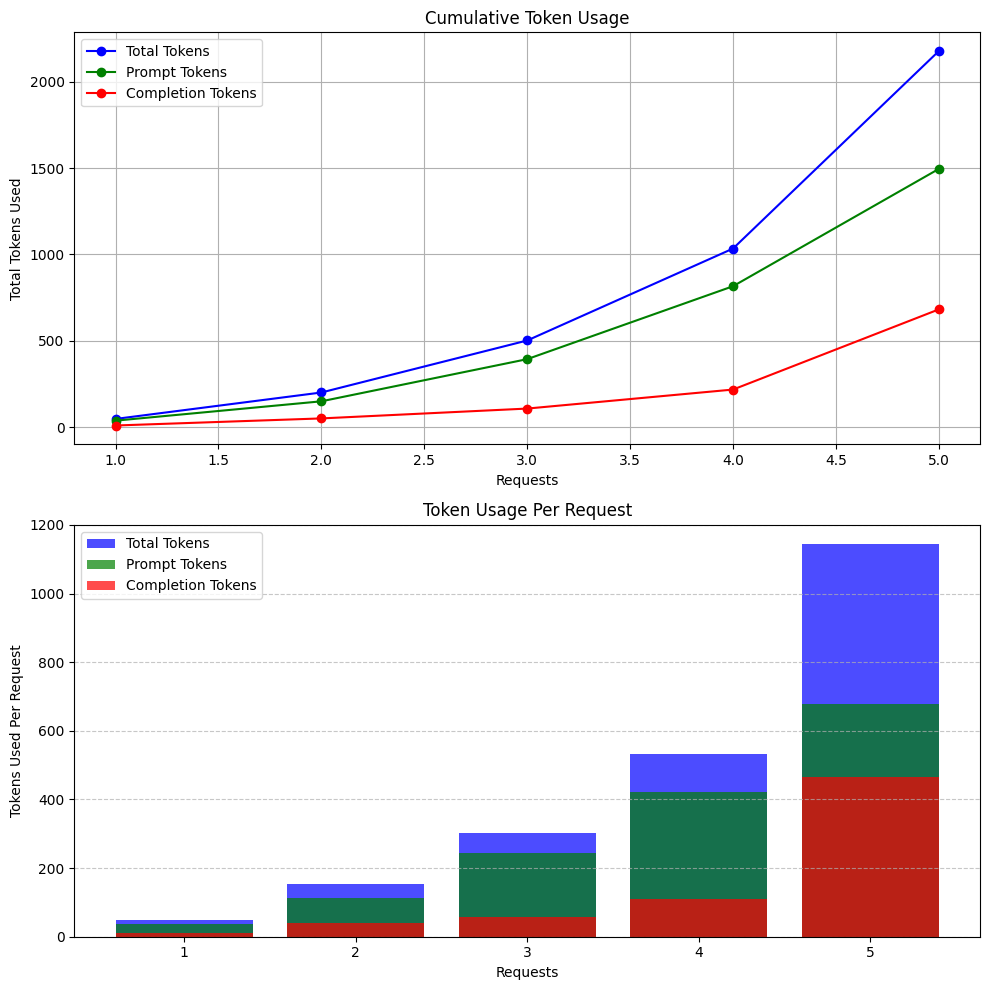

In [76]:
show_usage_plots()

In [77]:
import time
import copy
import matplotlib.pyplot as plt
from langchain.memory import ConversationBufferMemory
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain.chat_models import ChatOpenAI
from langchain.callbacks.openai_info import OpenAICallbackHandler

# Initialize callback handler for tracking tokens
callback_handler = OpenAICallbackHandler()

# Initialize LLM with callback
llm = ChatOpenAI(model_name="gpt-4o-mini", callbacks=[callback_handler])

# Initialize memory
memory = ConversationBufferMemory(return_messages=True)

# Define prompt template
template = """
    The following is a friendly conversation between an intelligent chatbot and a human.
    Chatbot: {history}
    Human: {input}
    Chatbot:
    """
prompt = PromptTemplate(template=template, input_variables=["history", "input"])

# Create LLMChain
chain = LLMChain(llm=llm, prompt=prompt, memory=memory, verbose=False)

# Token tracking lists
steps = []
cumulative_tokens = []
cumulative_prompt_tokens = []
cumulative_completion_tokens = []

individual_total_tokens = []
individual_prompt_tokens = []
individual_completion_tokens = []

# Version-controlled memory storage
chat_versions = []  # Stores tuples: (timestamp, chat history)

# Function to display current chat memory
def show_chat_memory():
    messages = memory.load_memory_variables({}).get("history", [])
    if not messages:
        print("\n⚠️ **Chat memory is empty!**")
        return

    print("\n🔎 **Current Chat Memory (Shared with Model):**")
    for i, msg in enumerate(messages):
        print(f"[{i}] {msg.type.capitalize()}: {msg.content}")
    print("-" * 50)

# Function to delete specific chat messages
def delete_chat_messages(indexes_to_delete):
    messages = memory.load_memory_variables({}).get("history", [])
    indexes_to_delete = sorted(set(indexes_to_delete), reverse=True)

    for index in indexes_to_delete:
        if 0 <= index < len(messages):
            del messages[index]

    memory.clear()
    for msg in messages:
        if msg.type == "human":
            memory.chat_memory.add_user_message(msg.content)
        else:
            memory.chat_memory.add_ai_message(msg.content)

    print(f"✅ **Deleted messages: {indexes_to_delete}!**")

# Function to show all saved chat versions
def show_chat_versions():
    if not chat_versions:
        print("\n⚠️ **No saved chat versions yet!**")
        return
    
    print("\n📜 **Saved Chat Versions:**")
    for i, (timestamp, chat) in enumerate(chat_versions):
        print(f"[{i}] Version {i} - Saved at {timestamp} ({len(chat)} messages)")

# Function to display messages inside a specific chat version
def show_version_messages(version_number):
    if 0 <= version_number < len(chat_versions):
        timestamp, chat = chat_versions[version_number]
        print(f"\n📜 **Messages from Version {version_number} (Saved at {timestamp}):**")
        for i, msg in enumerate(chat):
            print(f"[{i}] {msg.type.capitalize()}: {msg.content}")
    else:
        print("❌ Invalid version number!")

# Function to restore chat from a previous version
def restore_chat_version(version_number):
    if 0 <= version_number < len(chat_versions):
        timestamp, chat = chat_versions[version_number]
        memory.clear()
        for msg in chat:
            if msg.type == "human":
                memory.chat_memory.add_user_message(msg.content)
            else:
                memory.chat_memory.add_ai_message(msg.content)
        print(f"✅ **Restored chat to Version {version_number} (Saved at {timestamp})!**")
    else:
        print("❌ Invalid version number!")

# Function to display token usage plots
def show_usage_plots():
    fig, axs = plt.subplots(2, 1, figsize=(10, 10))

    axs[0].plot(steps, cumulative_tokens, label="Total Tokens", color="blue", marker="o")
    axs[0].plot(steps, cumulative_prompt_tokens, label="Prompt Tokens", color="green", marker="o")
    axs[0].plot(steps, cumulative_completion_tokens, label="Completion Tokens", color="red", marker="o")
    axs[0].set_title("Cumulative Token Usage")
    axs[0].set_xlabel("Requests")
    axs[0].set_ylabel("Total Tokens Used")
    axs[0].legend()
    axs[0].grid(True)

    axs[1].bar(steps, individual_total_tokens, label="Total Tokens", color="blue", alpha=0.7)
    axs[1].bar(steps, individual_prompt_tokens, label="Prompt Tokens", color="green", alpha=0.7)
    axs[1].bar(steps, individual_completion_tokens, label="Completion Tokens", color="red", alpha=0.7)
    axs[1].set_title("Token Usage Per Request")
    axs[1].set_xlabel("Requests")
    axs[1].set_ylabel("Tokens Used Per Request")
    axs[1].legend()
    axs[1].grid(axis="y", linestyle="--", alpha=0.7)

    plt.tight_layout()
    plt.show()

# Processing user inputs without interruptions
user_inputs = ["hi", "how are you?", "tell me a joke", "what is the meaning of life?", "explain quantum mechanics"]

for idx, user_input in enumerate(user_inputs):
    try:
        print(f"\n🟢 **User Input:** {user_input}")

        # Store chat version before modification
        timestamp = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())
        chat_versions.append((timestamp, copy.deepcopy(memory.load_memory_variables({}).get("history", []))))

        # Process user input
        result = chain.invoke(user_input)
        print("\n📝 **Response:**\n", result)

        # Token usage tracking
        total_used = callback_handler.total_tokens
        prompt_used = callback_handler.prompt_tokens
        completion_used = callback_handler.completion_tokens

        individual_total_tokens.append(total_used)
        individual_prompt_tokens.append(prompt_used)
        individual_completion_tokens.append(completion_used)

        steps.append(idx + 1)
        cumulative_tokens.append(sum(cumulative_tokens[-1:]) + total_used)
        cumulative_prompt_tokens.append(sum(cumulative_prompt_tokens[-1:]) + prompt_used)
        cumulative_completion_tokens.append(sum(cumulative_completion_tokens[-1:]) + completion_used)

        time.sleep(1)

    except Exception as e:
        print(f"❌ Error: {e}")

# 🚀 **Now all tracking happens in the background!**
# ✅ Run `show_chat_memory()` to see history
# ✅ Run `delete_chat_messages([index])` to delete specific messages
# ✅ Run `show_chat_versions()` to list all versions
# ✅ Run `show_version_messages(n)` to see messages inside a version
# ✅ Run `restore_chat_version(n)` to revert chat
# ✅ Run `show_usage_plots()` to visualize token usage



🟢 **User Input:** hi

📝 **Response:**
 {'input': 'hi', 'history': [HumanMessage(content='hi', additional_kwargs={}, response_metadata={}), AIMessage(content='Hello! How can I assist you today?', additional_kwargs={}, response_metadata={})], 'text': 'Hello! How can I assist you today?'}

🟢 **User Input:** how are you?

📝 **Response:**
 {'input': 'how are you?', 'history': [HumanMessage(content='hi', additional_kwargs={}, response_metadata={}), AIMessage(content='Hello! How can I assist you today?', additional_kwargs={}, response_metadata={}), HumanMessage(content='how are you?', additional_kwargs={}, response_metadata={}), AIMessage(content='AIMessage(content="I\'m just a program, so I don\'t have feelings, but I\'m here and ready to help you! How about you?", additional_kwargs={}, response_metadata={})', additional_kwargs={}, response_metadata={})], 'text': 'AIMessage(content="I\'m just a program, so I don\'t have feelings, but I\'m here and ready to help you! How about you?", additio

In [78]:
show_chat_memory()


🔎 **Current Chat Memory (Shared with Model):**
[0] Human: hi
[1] Ai: Hello! How can I assist you today?
[2] Human: how are you?
[3] Ai: AIMessage(content="I'm just a program, so I don't have feelings, but I'm here and ready to help you! How about you?", additional_kwargs={}, response_metadata={})
[4] Human: tell me a joke
[5] Ai: Sure! Here’s a joke for you: 

Why did the scarecrow win an award? 

Because he was outstanding in his field! 

Hope that made you smile!
[6] Human: what is the meaning of life?
[7] Ai: The meaning of life is a question that has puzzled humans for centuries! Different cultures, philosophies, and individuals offer various interpretations. Some might say it's about seeking happiness, forming connections with others, or pursuing knowledge and understanding. Others may find meaning through spirituality or contributing to the greater good. Ultimately, it’s a personal journey, and the meaning can differ from one person to another. What are your thoughts on it?
[8] 

In [79]:
delete_chat_messages([9])

✅ **Deleted messages: [9]!**


In [80]:
show_chat_versions()


📜 **Saved Chat Versions:**
[0] Version 0 - Saved at 2025-03-26 06:25:42 (0 messages)
[1] Version 1 - Saved at 2025-03-26 06:25:43 (2 messages)
[2] Version 2 - Saved at 2025-03-26 06:25:45 (4 messages)
[3] Version 3 - Saved at 2025-03-26 06:25:48 (6 messages)
[4] Version 4 - Saved at 2025-03-26 06:25:51 (8 messages)


In [81]:
show_version_messages(4)


📜 **Messages from Version 4 (Saved at 2025-03-26 06:25:51):**
[0] Human: hi
[1] Ai: Hello! How can I assist you today?
[2] Human: how are you?
[3] Ai: AIMessage(content="I'm just a program, so I don't have feelings, but I'm here and ready to help you! How about you?", additional_kwargs={}, response_metadata={})
[4] Human: tell me a joke
[5] Ai: Sure! Here’s a joke for you: 

Why did the scarecrow win an award? 

Because he was outstanding in his field! 

Hope that made you smile!
[6] Human: what is the meaning of life?
[7] Ai: The meaning of life is a question that has puzzled humans for centuries! Different cultures, philosophies, and individuals offer various interpretations. Some might say it's about seeking happiness, forming connections with others, or pursuing knowledge and understanding. Others may find meaning through spirituality or contributing to the greater good. Ultimately, it’s a personal journey, and the meaning can differ from one person to another. What are your thoug

In [82]:
restore_chat_version(2)

✅ **Restored chat to Version 2 (Saved at 2025-03-26 06:25:45)!**


In [83]:
show_chat_memory()


🔎 **Current Chat Memory (Shared with Model):**
[0] Human: hi
[1] Ai: Hello! How can I assist you today?
[2] Human: how are you?
[3] Ai: AIMessage(content="I'm just a program, so I don't have feelings, but I'm here and ready to help you! How about you?", additional_kwargs={}, response_metadata={})
--------------------------------------------------


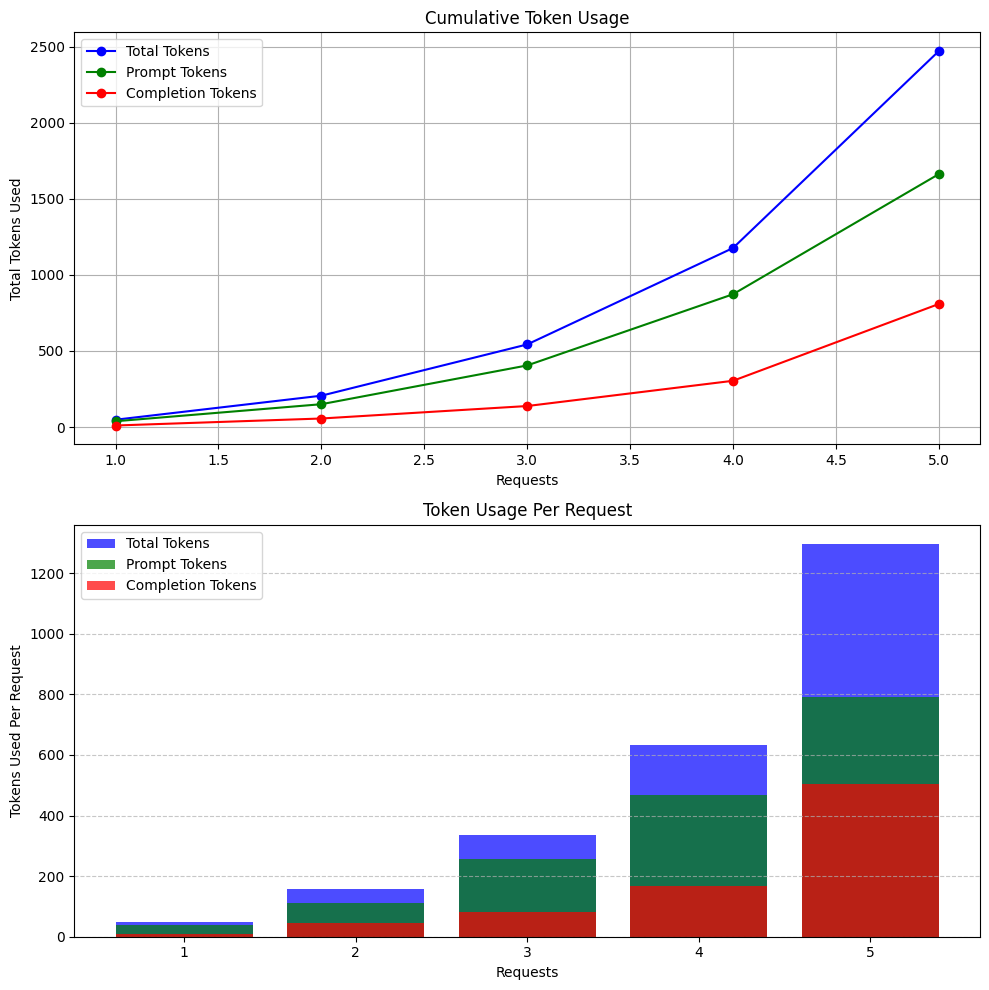

In [84]:
show_usage_plots()

In [85]:
import time
import copy
import matplotlib.pyplot as plt
from langchain.memory import ConversationBufferMemory
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain.chat_models import ChatOpenAI
from langchain.callbacks.openai_info import OpenAICallbackHandler

# Initialize callback handler for tracking tokens
callback_handler = OpenAICallbackHandler()

# Initialize LLM with callback
llm = ChatOpenAI(model_name="gpt-4o-mini", callbacks=[callback_handler])

# Initialize memory
memory = ConversationBufferMemory(return_messages=True)

# Define prompt template
template = """
    The following is a friendly conversation between an intelligent chatbot and a human.
    Chatbot: {history}
    Human: {input}
    Chatbot:
    """
prompt = PromptTemplate(template=template, input_variables=["history", "input"])

# Create LLMChain
chain = LLMChain(llm=llm, prompt=prompt, memory=memory, verbose=False)

# Token tracking lists
steps = []
cumulative_tokens = []
cumulative_prompt_tokens = []
cumulative_completion_tokens = []

individual_total_tokens = []
individual_prompt_tokens = []
individual_completion_tokens = []

# Version-controlled memory storage
chat_versions = []  # Stores tuples: (timestamp, chat history)

# Function to display current chat memory
def show_chat_memory():
    messages = memory.load_memory_variables({}).get("history", [])
    if not messages:
        print("\n⚠️ **Chat memory is empty!**")
        return

    print("\n🔎 **Current Chat Memory (Shared with Model):**")
    for i, msg in enumerate(messages):
        print(f"[{i}] {msg.type.capitalize()}: {msg.content}")
    print("-" * 50)

# Function to delete specific chat messages and save new version
def delete_chat_messages(indexes_to_delete):
    messages = memory.load_memory_variables({}).get("history", [])
    indexes_to_delete = sorted(set(indexes_to_delete), reverse=True)

    for index in indexes_to_delete:
        if 0 <= index < len(messages):
            del messages[index]

    memory.clear()
    for msg in messages:
        if msg.type == "human":
            memory.chat_memory.add_user_message(msg.content)
        else:
            memory.chat_memory.add_ai_message(msg.content)

    # Save new version after deletion
    timestamp = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())
    chat_versions.append((timestamp, copy.deepcopy(messages)))

    print(f"✅ **Deleted messages: {indexes_to_delete}!** A new version has been saved.")

# Function to show all saved chat versions
def show_chat_versions():
    if not chat_versions:
        print("\n⚠️ **No saved chat versions yet!**")
        return
    
    print("\n📜 **Saved Chat Versions:**")
    for i, (timestamp, chat) in enumerate(chat_versions):
        print(f"[{i}] Version {i} - Saved at {timestamp} ({len(chat)} messages)")

# Function to display messages inside a specific chat version
def show_version_messages(version_number):
    if 0 <= version_number < len(chat_versions):
        timestamp, chat = chat_versions[version_number]
        print(f"\n📜 **Messages from Version {version_number} (Saved at {timestamp}):**")
        for i, msg in enumerate(chat):
            print(f"[{i}] {msg.type.capitalize()}: {msg.content}")
    else:
        print("❌ Invalid version number!")

# Function to restore chat from a previous version
def restore_chat_version(version_number):
    if 0 <= version_number < len(chat_versions):
        timestamp, chat = chat_versions[version_number]
        memory.clear()
        for msg in chat:
            if msg.type == "human":
                memory.chat_memory.add_user_message(msg.content)
            else:
                memory.chat_memory.add_ai_message(msg.content)
        print(f"✅ **Restored chat to Version {version_number} (Saved at {timestamp})!**")
    else:
        print("❌ Invalid version number!")

# Function to display token usage plots
def show_usage_plots():
    fig, axs = plt.subplots(2, 1, figsize=(10, 10))

    axs[0].plot(steps, cumulative_tokens, label="Total Tokens", color="blue", marker="o")
    axs[0].plot(steps, cumulative_prompt_tokens, label="Prompt Tokens", color="green", marker="o")
    axs[0].plot(steps, cumulative_completion_tokens, label="Completion Tokens", color="red", marker="o")
    axs[0].set_title("Cumulative Token Usage")
    axs[0].set_xlabel("Requests")
    axs[0].set_ylabel("Total Tokens Used")
    axs[0].legend()
    axs[0].grid(True)

    axs[1].bar(steps, individual_total_tokens, label="Total Tokens", color="blue", alpha=0.7)
    axs[1].bar(steps, individual_prompt_tokens, label="Prompt Tokens", color="green", alpha=0.7)
    axs[1].bar(steps, individual_completion_tokens, label="Completion Tokens", color="red", alpha=0.7)
    axs[1].set_title("Token Usage Per Request")
    axs[1].set_xlabel("Requests")
    axs[1].set_ylabel("Tokens Used Per Request")
    axs[1].legend()
    axs[1].grid(axis="y", linestyle="--", alpha=0.7)

    plt.tight_layout()
    plt.show()

# Processing user inputs without interruptions
user_inputs = ["hi", "how are you?", "tell me a joke", "what is the meaning of life?", "explain quantum mechanics"]

for idx, user_input in enumerate(user_inputs):
    try:
        print(f"\n🟢 **User Input:** {user_input}")

        # Store chat version before modification
        timestamp = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())
        chat_versions.append((timestamp, copy.deepcopy(memory.load_memory_variables({}).get("history", []))))

        # Process user input
        result = chain.invoke(user_input)
        print("\n📝 **Response:**\n", result)

        # Token usage tracking
        total_used = callback_handler.total_tokens
        prompt_used = callback_handler.prompt_tokens
        completion_used = callback_handler.completion_tokens

        individual_total_tokens.append(total_used)
        individual_prompt_tokens.append(prompt_used)
        individual_completion_tokens.append(completion_used)

        steps.append(idx + 1)
        cumulative_tokens.append(sum(cumulative_tokens[-1:]) + total_used)
        cumulative_prompt_tokens.append(sum(cumulative_prompt_tokens[-1:]) + prompt_used)
        cumulative_completion_tokens.append(sum(cumulative_completion_tokens[-1:]) + completion_used)

        time.sleep(1)

    except Exception as e:
        print(f"❌ Error: {e}")

# 🚀 **Now all tracking happens in the background!**
# ✅ Run `show_chat_memory()` to see history
# ✅ Run `delete_chat_messages([index])` to delete specific messages
# ✅ Run `show_chat_versions()` to list all versions
# ✅ Run `show_version_messages(n)` to see messages inside a version
# ✅ Run `restore_chat_version(n)` to revert chat
# ✅ Run `show_usage_plots()` to visualize token usage



🟢 **User Input:** hi

📝 **Response:**
 {'input': 'hi', 'history': [HumanMessage(content='hi', additional_kwargs={}, response_metadata={}), AIMessage(content='Hello! How can I assist you today?', additional_kwargs={}, response_metadata={})], 'text': 'Hello! How can I assist you today?'}

🟢 **User Input:** how are you?

📝 **Response:**
 {'input': 'how are you?', 'history': [HumanMessage(content='hi', additional_kwargs={}, response_metadata={}), AIMessage(content='Hello! How can I assist you today?', additional_kwargs={}, response_metadata={}), HumanMessage(content='how are you?', additional_kwargs={}, response_metadata={}), AIMessage(content="I'm doing well, thank you! How about you? What’s on your mind today?", additional_kwargs={}, response_metadata={})], 'text': "I'm doing well, thank you! How about you? What’s on your mind today?"}

🟢 **User Input:** tell me a joke

📝 **Response:**
 {'input': 'tell me a joke', 'history': [HumanMessage(content='hi', additional_kwargs={}, response_met

In [86]:
show_chat_memory()


🔎 **Current Chat Memory (Shared with Model):**
[0] Human: hi
[1] Ai: Hello! How can I assist you today?
[2] Human: how are you?
[3] Ai: I'm doing well, thank you! How about you? What’s on your mind today?
[4] Human: tell me a joke
[5] Ai: AIMessage(content="Why don't scientists trust atoms? Because they make up everything!", additional_kwargs={}, response_metadata={})
[6] Human: what is the meaning of life?
[7] Ai: AIMessage(content="The meaning of life is a question that has been pondered for centuries! Some believe it's about seeking happiness and fulfillment, others think it's about connecting with others, and some find meaning in their beliefs or contributions to society. What do you think gives life meaning?", additional_kwargs={}, response_metadata={})
[8] Human: explain quantum mechanics
[9] Ai: Quantum mechanics is a fundamental theory in physics that describes the physical properties of nature at the scale of atoms and subatomic particles. Here are some key concepts:

1. **Wa

In [87]:
delete_chat_messages([9])

✅ **Deleted messages: [9]!** A new version has been saved.


In [88]:
show_chat_memory()


🔎 **Current Chat Memory (Shared with Model):**
[0] Human: hi
[1] Ai: Hello! How can I assist you today?
[2] Human: how are you?
[3] Ai: I'm doing well, thank you! How about you? What’s on your mind today?
[4] Human: tell me a joke
[5] Ai: AIMessage(content="Why don't scientists trust atoms? Because they make up everything!", additional_kwargs={}, response_metadata={})
[6] Human: what is the meaning of life?
[7] Ai: AIMessage(content="The meaning of life is a question that has been pondered for centuries! Some believe it's about seeking happiness and fulfillment, others think it's about connecting with others, and some find meaning in their beliefs or contributions to society. What do you think gives life meaning?", additional_kwargs={}, response_metadata={})
[8] Human: explain quantum mechanics
--------------------------------------------------


In [89]:
show_chat_versions()


📜 **Saved Chat Versions:**
[0] Version 0 - Saved at 2025-03-26 06:29:54 (0 messages)
[1] Version 1 - Saved at 2025-03-26 06:29:55 (2 messages)
[2] Version 2 - Saved at 2025-03-26 06:29:58 (4 messages)
[3] Version 3 - Saved at 2025-03-26 06:30:00 (6 messages)
[4] Version 4 - Saved at 2025-03-26 06:30:03 (8 messages)
[5] Version 5 - Saved at 2025-03-26 06:30:28 (9 messages)


In [94]:
show_version_messages(5)


📜 **Messages from Version 5 (Saved at 2025-03-26 06:30:28):**
[0] Human: hi
[1] Ai: Hello! How can I assist you today?
[2] Human: how are you?
[3] Ai: I'm doing well, thank you! How about you? What’s on your mind today?
[4] Human: tell me a joke
[5] Ai: AIMessage(content="Why don't scientists trust atoms? Because they make up everything!", additional_kwargs={}, response_metadata={})
[6] Human: what is the meaning of life?
[7] Ai: AIMessage(content="The meaning of life is a question that has been pondered for centuries! Some believe it's about seeking happiness and fulfillment, others think it's about connecting with others, and some find meaning in their beliefs or contributions to society. What do you think gives life meaning?", additional_kwargs={}, response_metadata={})
[8] Human: explain quantum mechanics


In [95]:
show_version_messages(4)


📜 **Messages from Version 4 (Saved at 2025-03-26 06:30:03):**
[0] Human: hi
[1] Ai: Hello! How can I assist you today?
[2] Human: how are you?
[3] Ai: I'm doing well, thank you! How about you? What’s on your mind today?
[4] Human: tell me a joke
[5] Ai: AIMessage(content="Why don't scientists trust atoms? Because they make up everything!", additional_kwargs={}, response_metadata={})
[6] Human: what is the meaning of life?
[7] Ai: AIMessage(content="The meaning of life is a question that has been pondered for centuries! Some believe it's about seeking happiness and fulfillment, others think it's about connecting with others, and some find meaning in their beliefs or contributions to society. What do you think gives life meaning?", additional_kwargs={}, response_metadata={})



📝 Response:
 {'input': 'hi', 'history': [HumanMessage(content='hi', additional_kwargs={}, response_metadata={}), AIMessage(content='Hello! How can I assist you today?', additional_kwargs={}, response_metadata={})], 'text': 'Hello! How can I assist you today?'}

📝 Response:
 {'input': 'how are you?', 'history': [HumanMessage(content='hi', additional_kwargs={}, response_metadata={}), AIMessage(content='Hello! How can I assist you today?', additional_kwargs={}, response_metadata={}), HumanMessage(content='how are you?', additional_kwargs={}, response_metadata={}), AIMessage(content="I'm just a program, so I don't have feelings, but I'm here and ready to help you! How about you? How are you doing today?", additional_kwargs={}, response_metadata={})], 'text': "I'm just a program, so I don't have feelings, but I'm here and ready to help you! How about you? How are you doing today?"}

📝 Response:
 {'input': 'tell me a joke', 'history': [HumanMessage(content='hi', additional_kwargs={}, respon

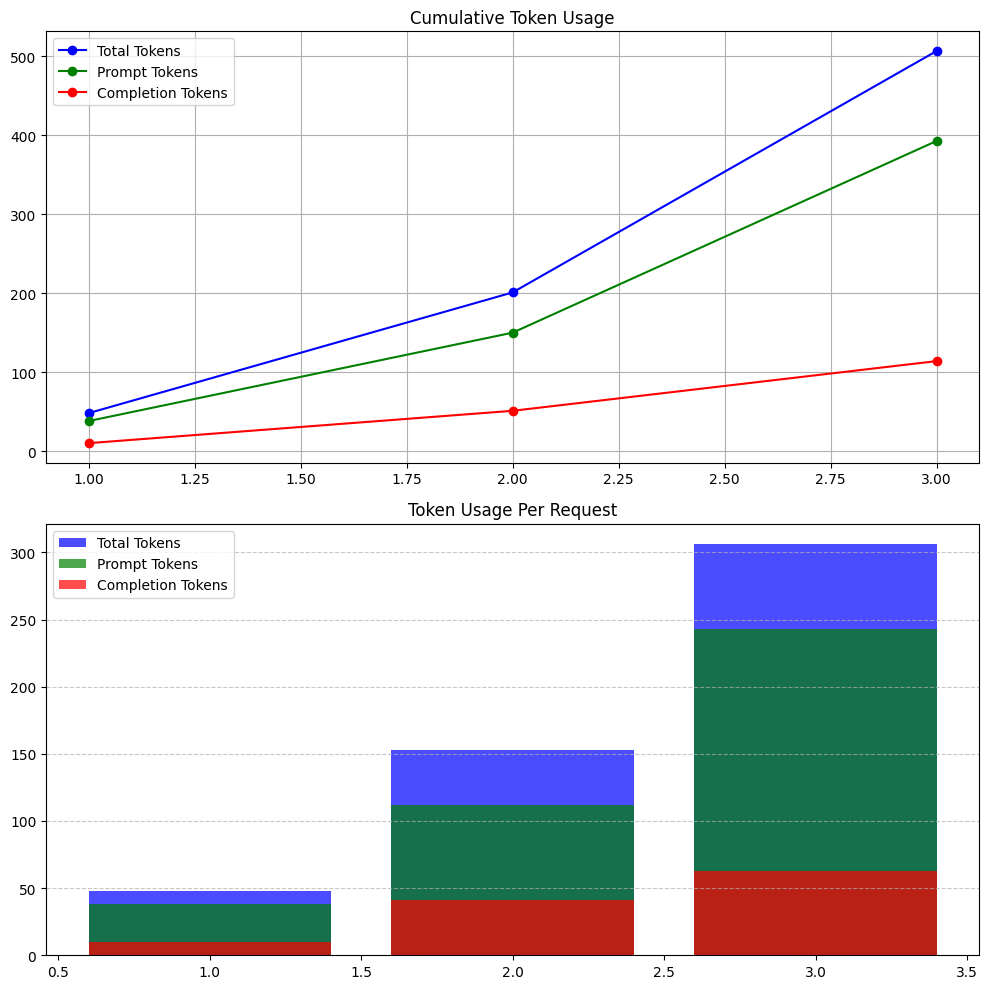

In [96]:
import time
import copy
import matplotlib.pyplot as plt
from langchain.memory import ConversationBufferMemory
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain.chat_models import ChatOpenAI
from langchain.callbacks.openai_info import OpenAICallbackHandler

class ChatManager:
    def __init__(self, model_name="gpt-4o-mini"):
        self.callback_handler = OpenAICallbackHandler()
        self.llm = ChatOpenAI(model_name=model_name, callbacks=[self.callback_handler])
        self.memory = ConversationBufferMemory(return_messages=True)
        self.prompt = self._create_prompt_template()
        self.chain = LLMChain(llm=self.llm, prompt=self.prompt, memory=self.memory, verbose=False)
        
        self.token_usage = {
            "steps": [],
            "cumulative_tokens": [],
            "cumulative_prompt_tokens": [],
            "cumulative_completion_tokens": [],
            "individual_total_tokens": [],
            "individual_prompt_tokens": [],
            "individual_completion_tokens": []
        }
        
        self.chat_versions = []
        self.current_version = None
    
    def _create_prompt_template(self):
        template = """
        The following is a friendly conversation between an intelligent chatbot and a human.
        Chatbot: {history}
        Human: {input}
        Chatbot:
        """
        return PromptTemplate(template=template, input_variables=["history", "input"])
    
    def process_user_input(self, user_input):
        timestamp = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())
        self.chat_versions.append((timestamp, copy.deepcopy(self.memory.load_memory_variables({}).get("history", []))))
        self.current_version = len(self.chat_versions) - 1
        
        result = self.chain.invoke(user_input)
        self._track_token_usage()
        return result
    
    def _track_token_usage(self):
        total_used = self.callback_handler.total_tokens
        prompt_used = self.callback_handler.prompt_tokens
        completion_used = self.callback_handler.completion_tokens
        
        self.token_usage["individual_total_tokens"].append(total_used)
        self.token_usage["individual_prompt_tokens"].append(prompt_used)
        self.token_usage["individual_completion_tokens"].append(completion_used)
        
        steps = len(self.token_usage["steps"]) + 1
        self.token_usage["steps"].append(steps)
        self.token_usage["cumulative_tokens"].append(sum(self.token_usage["cumulative_tokens"][-1:]) + total_used)
        self.token_usage["cumulative_prompt_tokens"].append(sum(self.token_usage["cumulative_prompt_tokens"][-1:]) + prompt_used)
        self.token_usage["cumulative_completion_tokens"].append(sum(self.token_usage["cumulative_completion_tokens"][-1:]) + completion_used)
    
    def delete_chat_messages(self, indexes_to_delete):
        latest_messages = copy.deepcopy(self.memory.load_memory_variables({}).get("history", []))
        if not latest_messages:
            print("⚠️ No messages to delete!")
            return
        
        timestamp = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())
        self.chat_versions.append((timestamp, latest_messages))
        previous_version = len(self.chat_versions) - 1
        
        new_version_messages = copy.deepcopy(latest_messages)
        for index in sorted(set(indexes_to_delete), reverse=True):
            if 0 <= index < len(new_version_messages):
                del new_version_messages[index]
        
        self.memory.clear()
        for msg in new_version_messages:
            if msg.type == "human":
                self.memory.chat_memory.add_user_message(msg.content)
            else:
                self.memory.chat_memory.add_ai_message(msg.content)
        
        self.chat_versions.append((timestamp, copy.deepcopy(new_version_messages)))
        self.current_version = len(self.chat_versions) - 1
        print(f"✅ Created new version {self.current_version} after deletion! (Previous version {previous_version} is still safe)")
    
    def show_usage_plots(self):
        fig, axs = plt.subplots(2, 1, figsize=(10, 10))
        axs[0].plot(self.token_usage["steps"], self.token_usage["cumulative_tokens"], label="Total Tokens", color="blue", marker="o")
        axs[0].plot(self.token_usage["steps"], self.token_usage["cumulative_prompt_tokens"], label="Prompt Tokens", color="green", marker="o")
        axs[0].plot(self.token_usage["steps"], self.token_usage["cumulative_completion_tokens"], label="Completion Tokens", color="red", marker="o")
        axs[0].set_title("Cumulative Token Usage")
        axs[0].legend()
        axs[0].grid(True)
        
        axs[1].bar(self.token_usage["steps"], self.token_usage["individual_total_tokens"], label="Total Tokens", color="blue", alpha=0.7)
        axs[1].bar(self.token_usage["steps"], self.token_usage["individual_prompt_tokens"], label="Prompt Tokens", color="green", alpha=0.7)
        axs[1].bar(self.token_usage["steps"], self.token_usage["individual_completion_tokens"], label="Completion Tokens", color="red", alpha=0.7)
        axs[1].set_title("Token Usage Per Request")
        axs[1].legend()
        axs[1].grid(axis="y", linestyle="--", alpha=0.7)
        
        plt.tight_layout()
        plt.show()

# Example Usage
chat_manager = ChatManager()
user_inputs = ["hi", "how are you?", "tell me a joke"]

for user_input in user_inputs:
    response = chat_manager.process_user_input(user_input)
    print("\n📝 Response:\n", response)

chat_manager.show_usage_plots()


In [98]:
chat_manager.chat_versions

[('2025-03-26 06:34:57', []),
 ('2025-03-26 06:34:58',
  [HumanMessage(content='hi', additional_kwargs={}, response_metadata={}),
   AIMessage(content='Hello! How can I assist you today?', additional_kwargs={}, response_metadata={})]),
 ('2025-03-26 06:34:59',
  [HumanMessage(content='hi', additional_kwargs={}, response_metadata={}),
   AIMessage(content='Hello! How can I assist you today?', additional_kwargs={}, response_metadata={}),
   HumanMessage(content='how are you?', additional_kwargs={}, response_metadata={}),
   AIMessage(content="I'm just a program, so I don't have feelings, but I'm here and ready to help you! How about you? How are you doing today?", additional_kwargs={}, response_metadata={})])]

In [100]:
chat_manager.delete_chat_messages()

TypeError: ChatManager.delete_chat_messages() missing 1 required positional argument: 'indexes_to_delete'

In [101]:
# Initialize chat manager
chat_manager = ChatManager()

# Step 1: Process user inputs
user_inputs = ["hi", "how are you?", "tell me a joke"]
for user_input in user_inputs:
    print("\n🟢 Sending Input:", user_input)
    response = chat_manager.process_user_input(user_input)
    print("\n📝 Response:\n", response)

# Step 2: View chat versions
chat_manager.show_chat_versions()

# Step 3: Show messages in latest version
chat_manager.show_version_messages(chat_manager.current_version)

# Step 4: Delete a message & create a new version
chat_manager.delete_chat_messages([1])  # Delete the second message
chat_manager.show_chat_versions()  # Check new version

# Step 5: Restore an older version
chat_manager.restore_chat_version(0)
chat_manager.show_version_messages(0)  # Show restored messages

# Step 6: View token usage plots
chat_manager.show_usage_plots()



🟢 Sending Input: hi

📝 Response:
 {'input': 'hi', 'history': [HumanMessage(content='hi', additional_kwargs={}, response_metadata={}), AIMessage(content='Hello! How can I assist you today?', additional_kwargs={}, response_metadata={})], 'text': 'Hello! How can I assist you today?'}

🟢 Sending Input: how are you?

📝 Response:
 {'input': 'how are you?', 'history': [HumanMessage(content='hi', additional_kwargs={}, response_metadata={}), AIMessage(content='Hello! How can I assist you today?', additional_kwargs={}, response_metadata={}), HumanMessage(content='how are you?', additional_kwargs={}, response_metadata={}), AIMessage(content='AIMessage(content="I\'m just a program, so I don\'t have feelings, but I\'m here and ready to help you! How about you?", additional_kwargs={}, response_metadata={})', additional_kwargs={}, response_metadata={})], 'text': 'AIMessage(content="I\'m just a program, so I don\'t have feelings, but I\'m here and ready to help you! How about you?", additional_kwargs

AttributeError: 'ChatManager' object has no attribute 'show_chat_versions'

In [102]:
import time
import copy
import matplotlib.pyplot as plt
from langchain.memory import ConversationBufferMemory
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain.chat_models import ChatOpenAI
from langchain.callbacks.openai_info import OpenAICallbackHandler

class ChatManager:
    def __init__(self, model_name="gpt-4o-mini"):
        self.callback_handler = OpenAICallbackHandler()
        self.llm = ChatOpenAI(model_name=model_name, callbacks=[self.callback_handler])
        self.memory = ConversationBufferMemory(return_messages=True)
        self.prompt = self._create_prompt_template()
        self.chain = LLMChain(llm=self.llm, prompt=self.prompt, memory=self.memory, verbose=False)

        self.token_usage = {
            "steps": [],
            "cumulative_tokens": [],
            "cumulative_prompt_tokens": [],
            "cumulative_completion_tokens": [],
            "individual_total_tokens": [],
            "individual_prompt_tokens": [],
            "individual_completion_tokens": []
        }

        self.chat_versions = []
        self.current_version = None

    def _create_prompt_template(self):
        template = """
        The following is a friendly conversation between an intelligent chatbot and a human.
        Chatbot: {history}
        Human: {input}
        Chatbot:
        """
        return PromptTemplate(template=template, input_variables=["history", "input"])

    def process_user_input(self, user_input):
        timestamp = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())
        self.chat_versions.append((timestamp, copy.deepcopy(self.memory.load_memory_variables({}).get("history", []))))
        self.current_version = len(self.chat_versions) - 1

        result = self.chain.invoke(user_input)
        self._track_token_usage()
        return result

    def _track_token_usage(self):
        total_used = self.callback_handler.total_tokens
        prompt_used = self.callback_handler.prompt_tokens
        completion_used = self.callback_handler.completion_tokens

        self.token_usage["individual_total_tokens"].append(total_used)
        self.token_usage["individual_prompt_tokens"].append(prompt_used)
        self.token_usage["individual_completion_tokens"].append(completion_used)

        steps = len(self.token_usage["steps"]) + 1
        self.token_usage["steps"].append(steps)
        self.token_usage["cumulative_tokens"].append(sum(self.token_usage["cumulative_tokens"][-1:]) + total_used)
        self.token_usage["cumulative_prompt_tokens"].append(sum(self.token_usage["cumulative_prompt_tokens"][-1:]) + prompt_used)
        self.token_usage["cumulative_completion_tokens"].append(sum(self.token_usage["cumulative_completion_tokens"][-1:]) + completion_used)

    def show_chat_versions(self):
        """Displays all chat versions saved so far."""
        print("\n📜 Chat Versions:")
        for i, (timestamp, _) in enumerate(self.chat_versions):
            mark = " (In Use) 🔵" if i == self.current_version else ""
            print(f"Version {i}: {timestamp}{mark}")

    def show_version_messages(self, version_number):
        """Displays all messages from a specific chat version."""
        if 0 <= version_number < len(self.chat_versions):
            print(f"\n🗂️ Messages in Version {version_number}:")
            for i, msg in enumerate(self.chat_versions[version_number][1]):
                print(f"{i}. {msg.type}: {msg.content}")
        else:
            print("⚠️ Invalid version number!")

    def restore_chat_version(self, version_number):
        """Restores a previous chat version for future chat interactions."""
        if 0 <= version_number < len(self.chat_versions):
            self.memory.clear()
            for msg in self.chat_versions[version_number][1]:
                if msg.type == "human":
                    self.memory.chat_memory.add_user_message(msg.content)
                else:
                    self.memory.chat_memory.add_ai_message(msg.content)
            self.current_version = version_number
            print(f"✅ Restored to Version {version_number}!")
        else:
            print("⚠️ Invalid version number!")

    def delete_chat_messages(self, indexes_to_delete):
        """Deletes selected messages & creates a new version without them."""
        latest_messages = copy.deepcopy(self.memory.load_memory_variables({}).get("history", []))
        if not latest_messages:
            print("⚠️ No messages to delete!")
            return

        timestamp = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())
        previous_version = len(self.chat_versions) - 1

        new_version_messages = copy.deepcopy(latest_messages)
        for index in sorted(set(indexes_to_delete), reverse=True):
            if 0 <= index < len(new_version_messages):
                del new_version_messages[index]

        self.memory.clear()
        for msg in new_version_messages:
            if msg.type == "human":
                self.memory.chat_memory.add_user_message(msg.content)
            else:
                self.memory.chat_memory.add_ai_message(msg.content)

        self.chat_versions.append((timestamp, copy.deepcopy(new_version_messages)))
        self.current_version = len(self.chat_versions) - 1
        print(f"✅ Created new version {self.current_version} after deletion! (Previous version {previous_version} is still safe)")

    def show_usage_plots(self):
        """Displays cumulative & per-request token usage plots."""
        fig, axs = plt.subplots(2, 1, figsize=(10, 10))
        axs[0].plot(self.token_usage["steps"], self.token_usage["cumulative_tokens"], label="Total Tokens", color="blue", marker="o")
        axs[0].plot(self.token_usage["steps"], self.token_usage["cumulative_prompt_tokens"], label="Prompt Tokens", color="green", marker="o")
        axs[0].plot(self.token_usage["steps"], self.token_usage["cumulative_completion_tokens"], label="Completion Tokens", color="red", marker="o")
        axs[0].set_title("Cumulative Token Usage")
        axs[0].legend()
        axs[0].grid(True)

        axs[1].bar(self.token_usage["steps"], self.token_usage["individual_total_tokens"], label="Total Tokens", color="blue", alpha=0.7)
        axs[1].bar(self.token_usage["steps"], self.token_usage["individual_prompt_tokens"], label="Prompt Tokens", color="green", alpha=0.7)
        axs[1].bar(self.token_usage["steps"], self.token_usage["individual_completion_tokens"], label="Completion Tokens", color="red", alpha=0.7)
        axs[1].set_title("Token Usage Per Request")
        axs[1].legend()
        axs[1].grid(axis="y", linestyle="--", alpha=0.7)

        plt.tight_layout()
        plt.show()



🟢 Sending Input: hi

📝 Response:
 {'input': 'hi', 'history': [HumanMessage(content='hi', additional_kwargs={}, response_metadata={}), AIMessage(content='Hello! How can I assist you today?', additional_kwargs={}, response_metadata={})], 'text': 'Hello! How can I assist you today?'}

🟢 Sending Input: how are you?

📝 Response:
 {'input': 'how are you?', 'history': [HumanMessage(content='hi', additional_kwargs={}, response_metadata={}), AIMessage(content='Hello! How can I assist you today?', additional_kwargs={}, response_metadata={}), HumanMessage(content='how are you?', additional_kwargs={}, response_metadata={}), AIMessage(content="I'm doing great, thank you! How about you?", additional_kwargs={}, response_metadata={})], 'text': "I'm doing great, thank you! How about you?"}

🟢 Sending Input: tell me a joke

📝 Response:
 {'input': 'tell me a joke', 'history': [HumanMessage(content='hi', additional_kwargs={}, response_metadata={}), AIMessage(content='Hello! How can I assist you today?', 

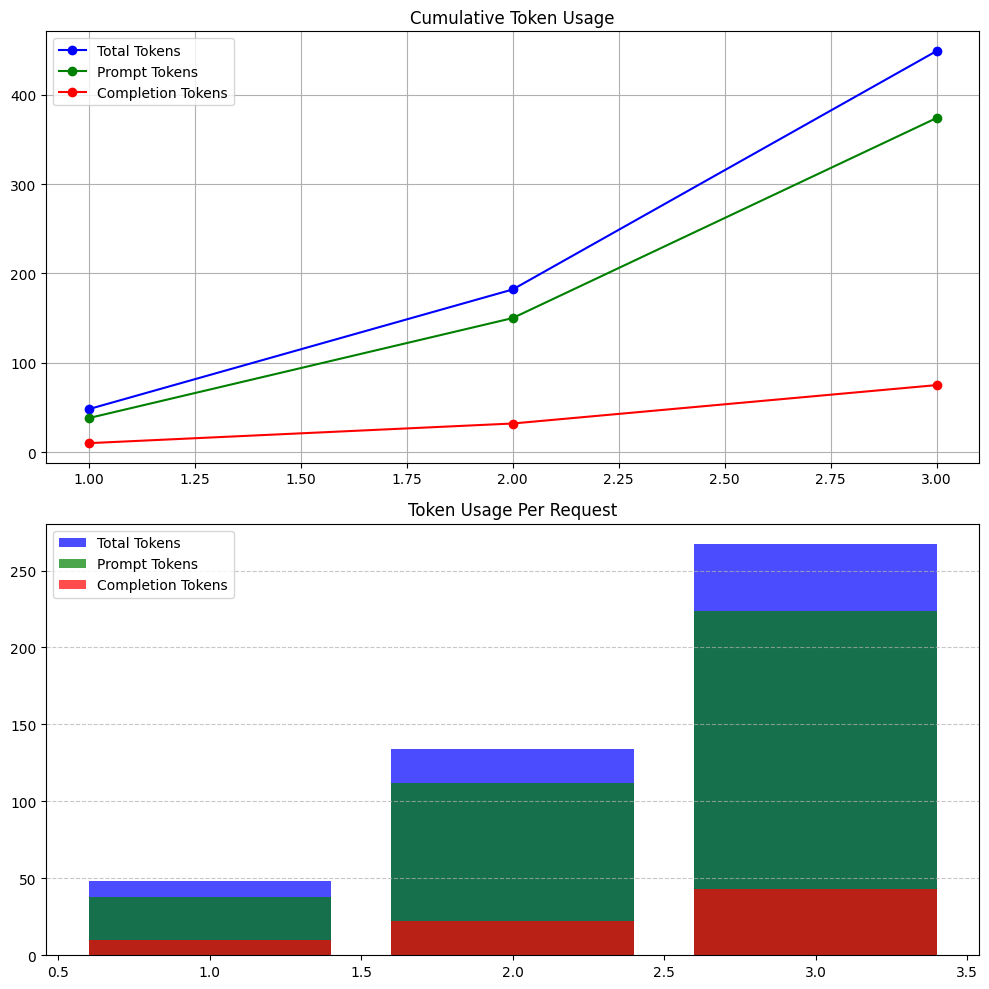

In [103]:
# Initialize chat manager
chat_manager = ChatManager()

# Step 1: Process user inputs
user_inputs = ["hi", "how are you?", "tell me a joke"]
for user_input in user_inputs:
    print("\n🟢 Sending Input:", user_input)
    response = chat_manager.process_user_input(user_input)
    print("\n📝 Response:\n", response)

# Step 2: View chat versions
chat_manager.show_chat_versions()

# Step 3: Show messages in latest version
chat_manager.show_version_messages(chat_manager.current_version)

# Step 4: Delete a message & create a new version
chat_manager.delete_chat_messages([1])  # Delete the second message
chat_manager.show_chat_versions()  # Check new version

# Step 5: Restore an older version
chat_manager.restore_chat_version(0)
chat_manager.show_version_messages(0)  # Show restored messages

# Step 6: View token usage plots
chat_manager.show_usage_plots()


In [104]:
chat_manager.show_chat_versions() 


📜 Chat Versions:
Version 0: 2025-03-26 06:37:34 (In Use) 🔵
Version 1: 2025-03-26 06:37:34
Version 2: 2025-03-26 06:37:35
Version 3: 2025-03-26 06:37:36


In [105]:
chat_manager.show_version_messages(3)


🗂️ Messages in Version 3:
0. human: hi
1. human: how are you?
2. ai: I'm doing great, thank you! How about you?
3. human: tell me a joke
4. ai: Sure! Why did the scarecrow win an award? 

Because he was outstanding in his field!


In [106]:
chat_manager.delete_chat_messages([4])

⚠️ No messages to delete!


In [107]:
chat_manager.show_version_messages(3)


🗂️ Messages in Version 3:
0. human: hi
1. human: how are you?
2. ai: I'm doing great, thank you! How about you?
3. human: tell me a joke
4. ai: Sure! Why did the scarecrow win an award? 

Because he was outstanding in his field!


In [108]:
chat_manager.delete_chat_messages([1])

⚠️ No messages to delete!


In [1]:
import time
import copy
import matplotlib.pyplot as plt
from langchain.memory import ConversationBufferMemory
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain.chat_models import ChatOpenAI
from langchain.callbacks.openai_info import OpenAICallbackHandler

class ChatManager:
    def __init__(self, model_name="gpt-4o-mini"):
        """Initializes the Chat Manager with memory, LLM model, and token tracking."""
        self.callback_handler = OpenAICallbackHandler()
        self.llm = ChatOpenAI(model_name=model_name, callbacks=[self.callback_handler])
        self.memory = ConversationBufferMemory(return_messages=True)
        self.prompt = self._create_prompt_template()
        self.chain = LLMChain(llm=self.llm, prompt=self.prompt, memory=self.memory, verbose=False)

        self.token_usage = {
            "steps": [],
            "cumulative_tokens": [],
            "cumulative_prompt_tokens": [],
            "cumulative_completion_tokens": [],
            "individual_total_tokens": [],
            "individual_prompt_tokens": [],
            "individual_completion_tokens": []
        }

        self.chat_versions = []
        self.current_version = None

    def _create_prompt_template(self):
        """Defines the chat prompt format."""
        template = """
        The following is a friendly conversation between an intelligent chatbot and a human.
        Chatbot: {history}
        Human: {input}
        Chatbot:
        """
        return PromptTemplate(template=template, input_variables=["history", "input"])

    def process_user_input(self, user_input):
        """Processes user input, updates chat memory, and tracks token usage."""
        timestamp = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())
        self.chat_versions.append((timestamp, copy.deepcopy(self.memory.chat_memory.messages)))
        self.current_version = len(self.chat_versions) - 1

        result = self.chain.invoke(user_input)
        self._track_token_usage()
        return result

    def _track_token_usage(self):
        """Tracks token usage for cumulative and per-request analysis."""
        total_used = self.callback_handler.total_tokens
        prompt_used = self.callback_handler.prompt_tokens
        completion_used = self.callback_handler.completion_tokens

        self.token_usage["individual_total_tokens"].append(total_used)
        self.token_usage["individual_prompt_tokens"].append(prompt_used)
        self.token_usage["individual_completion_tokens"].append(completion_used)

        steps = len(self.token_usage["steps"]) + 1
        self.token_usage["steps"].append(steps)
        self.token_usage["cumulative_tokens"].append(sum(self.token_usage["cumulative_tokens"][-1:]) + total_used)
        self.token_usage["cumulative_prompt_tokens"].append(sum(self.token_usage["cumulative_prompt_tokens"][-1:]) + prompt_used)
        self.token_usage["cumulative_completion_tokens"].append(sum(self.token_usage["cumulative_completion_tokens"][-1:]) + completion_used)

    def show_chat_versions(self):
        """Displays all chat versions saved so far."""
        print("\n📜 Chat Versions:")
        for i, (timestamp, _) in enumerate(self.chat_versions):
            mark = " (In Use) 🔵" if i == self.current_version else ""
            print(f"Version {i}: {timestamp}{mark}")

    def show_version_messages(self, version_number):
        """Displays all messages from a specific chat version."""
        if 0 <= version_number < len(self.chat_versions):
            print(f"\n🗂️ Messages in Version {version_number}:")
            for i, msg in enumerate(self.chat_versions[version_number][1]):
                print(f"{i}. {msg.type}: {msg.content}")
        else:
            print("⚠️ Invalid version number!")

    def restore_chat_version(self, version_number):
        """Restores a previous chat version for future interactions."""
        if 0 <= version_number < len(self.chat_versions):
            self.memory.clear()
            for msg in self.chat_versions[version_number][1]:
                if msg.type == "human":
                    self.memory.chat_memory.add_user_message(msg.content)
                else:
                    self.memory.chat_memory.add_ai_message(msg.content)
            self.current_version = version_number
            print(f"✅ Restored to Version {version_number}!")
        else:
            print("⚠️ Invalid version number!")

    def delete_chat_messages(self, indexes_to_delete):
        """Deletes selected messages & creates a new version without them."""
        latest_messages = copy.deepcopy(self.memory.chat_memory.messages)

        if not latest_messages:
            print("⚠️ No messages to delete!")
            return

        timestamp = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())
        previous_version = self.current_version

        new_version_messages = [msg for i, msg in enumerate(latest_messages) if i not in indexes_to_delete]

        self.memory.clear()
        for msg in new_version_messages:
            if msg.type == "human":
                self.memory.chat_memory.add_user_message(msg.content)
            else:
                self.memory.chat_memory.add_ai_message(msg.content)

        self.chat_versions.append((timestamp, copy.deepcopy(new_version_messages)))
        self.current_version = len(self.chat_versions) - 1

        print(f"✅ Created new version {self.current_version} after deletion! (Previous version {previous_version} is still safe)")

    def show_usage_plots(self):
        """Displays cumulative & per-request token usage plots."""
        fig, axs = plt.subplots(2, 1, figsize=(10, 10))
        axs[0].plot(self.token_usage["steps"], self.token_usage["cumulative_tokens"], label="Total Tokens", color="blue", marker="o")
        axs[0].plot(self.token_usage["steps"], self.token_usage["cumulative_prompt_tokens"], label="Prompt Tokens", color="green", marker="o")
        axs[0].plot(self.token_usage["steps"], self.token_usage["cumulative_completion_tokens"], label="Completion Tokens", color="red", marker="o")
        axs[0].set_title("Cumulative Token Usage")
        axs[0].legend()
        axs[0].grid(True)

        axs[1].bar(self.token_usage["steps"], self.token_usage["individual_total_tokens"], label="Total Tokens", color="blue", alpha=0.7)
        axs[1].bar(self.token_usage["steps"], self.token_usage["individual_prompt_tokens"], label="Prompt Tokens", color="green", alpha=0.7)
        axs[1].bar(self.token_usage["steps"], self.token_usage["individual_completion_tokens"], label="Completion Tokens", color="red", alpha=0.7)
        axs[1].set_title("Token Usage Per Request")
        axs[1].legend()
        axs[1].grid(axis="y", linestyle="--", alpha=0.7)

        plt.tight_layout()
        plt.show()


In [2]:
# Initialize chat manager
chat_manager = ChatManager()

/tmp/ipykernel_58295/3128172619.py:14: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  self.llm = ChatOpenAI(model_name=model_name, callbacks=[self.callback_handler])
/tmp/ipykernel_58295/3128172619.py:15: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  self.memory = ConversationBufferMemory(return_messages=True)
/tmp/ipykernel_58295/3128172619.py:17: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
  self.chain = LLMChain(llm=self.llm, prompt=self.prompt, memory=self.memory, verbose=False)

In [3]:
# Step 1: Process user inputs
user_inputs = ["hi", "how are you?", "tell me a joke"]
for user_input in user_inputs:
    chat_manager.process_user_input(user_input)

In [4]:
# Step 2: View chat versions
chat_manager.show_chat_versions()


📜 Chat Versions:
Version 0: 2025-03-26 06:45:49
Version 1: 2025-03-26 06:45:49
Version 2: 2025-03-26 06:45:50 (In Use) 🔵


In [5]:
# Step 3: Show messages in the latest version
chat_manager.show_version_messages(chat_manager.current_version)


🗂️ Messages in Version 2:
0. human: hi
1. ai: Hello! How can I assist you today?
2. human: how are you?
3. ai: AIMessage(content='I’m just a program, so I don’t have feelings, but I’m here and ready to help you! How about you?', additional_kwargs={}, response_metadata={})


In [6]:
# Step 4: Delete a message & create a new version
chat_manager.delete_chat_messages([1])  # Delete second message
chat_manager.show_chat_versions()
chat_manager.show_version_messages(chat_manager.current_version)

✅ Created new version 3 after deletion! (Previous version 2 is still safe)

📜 Chat Versions:
Version 0: 2025-03-26 06:45:49
Version 1: 2025-03-26 06:45:49
Version 2: 2025-03-26 06:45:50
Version 3: 2025-03-26 06:46:11 (In Use) 🔵

🗂️ Messages in Version 3:
0. human: hi
1. human: how are you?
2. ai: AIMessage(content='I’m just a program, so I don’t have feelings, but I’m here and ready to help you! How about you?', additional_kwargs={}, response_metadata={})
3. human: tell me a joke
4. ai: Sure! Here’s a joke for you: 

Why don’t scientists trust atoms? 

Because they make up everything! 

Hope that brought a smile! Want to hear another one?


In [8]:
# Step 5: Restore an older version
chat_manager.restore_chat_version(1)
chat_manager.show_version_messages(1)

✅ Restored to Version 1!

🗂️ Messages in Version 1:
0. human: hi
1. ai: Hello! How can I assist you today?


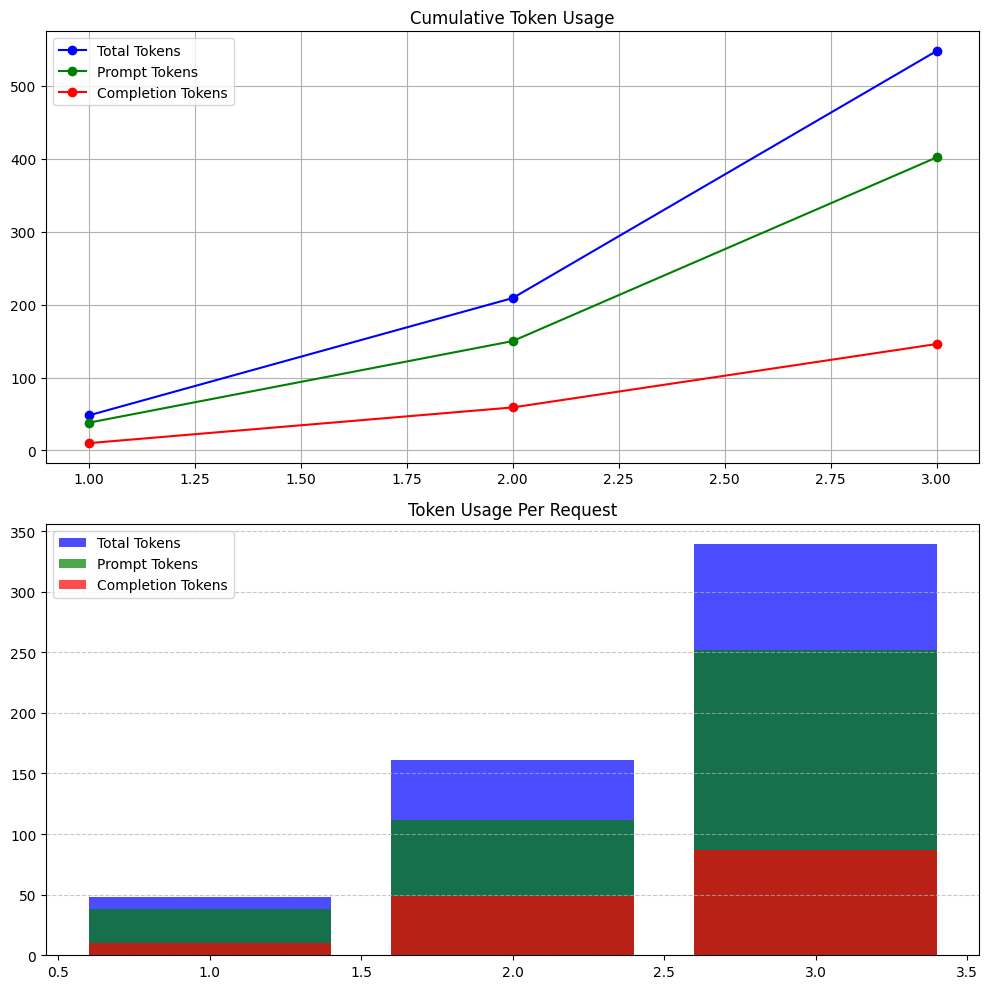

In [9]:
# Step 6: View token usage plots
chat_manager.show_usage_plots()

In [10]:
# Step 1: Process user inputs
user_inputs = ["hi", "how are you?", "tell me a joke"]
for user_input in user_inputs:
    chat_manager.process_user_input(user_input)

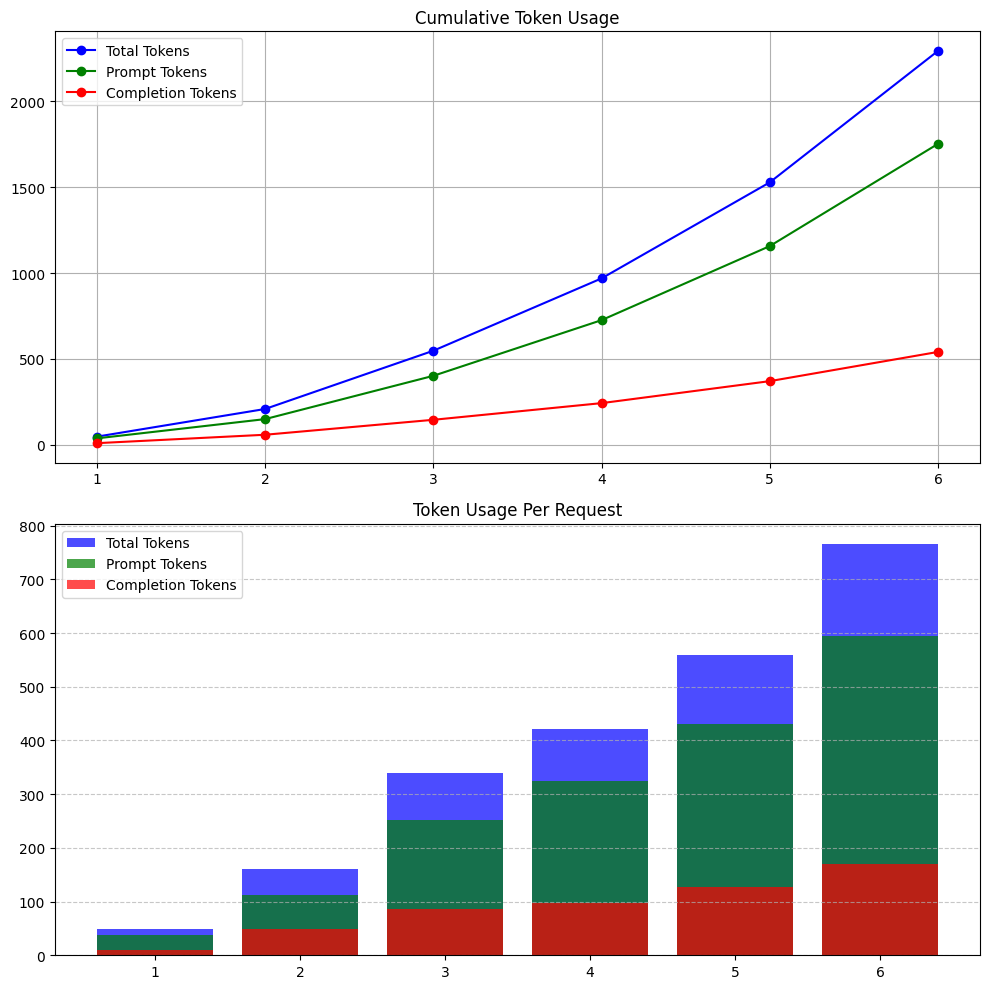

In [11]:
# Step 6: View token usage plots
chat_manager.show_usage_plots()

In [12]:
# Step 3: Show messages in the latest version
chat_manager.show_version_messages(chat_manager.current_version)


🗂️ Messages in Version 6:
0. human: hi
1. ai: Hello! How can I assist you today?
2. human: hi
3. ai: Hello! How can I assist you today?
4. human: how are you?
5. ai: I'm just a program, so I don't have feelings, but I'm here and ready to help you! How about you? How are you doing today?


In [1]:
import time
import copy
import matplotlib.pyplot as plt
from langchain.memory import ConversationBufferMemory
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain.chat_models import ChatOpenAI
from langchain.callbacks.openai_info import OpenAICallbackHandler

class ChatManager:
    def __init__(self, model_name="gpt-4o-mini"):
        """Initializes the Chat Manager with memory, LLM model, and token tracking."""
        self.callback_handler = OpenAICallbackHandler()
        self.llm = ChatOpenAI(model_name=model_name, callbacks=[self.callback_handler])
        self.memory = ConversationBufferMemory(return_messages=True)
        self.prompt = self._create_prompt_template()
        self.chain = LLMChain(llm=self.llm, prompt=self.prompt, memory=self.memory, verbose=False)

        self.token_usage = {
            "steps": [],
            "cumulative_tokens": [],
            "cumulative_prompt_tokens": [],
            "cumulative_completion_tokens": [],
            "individual_total_tokens": [],
            "individual_prompt_tokens": [],
            "individual_completion_tokens": []
        }

        self.chat_versions = []
        self.current_version = None

    def _create_prompt_template(self):
        """Defines the chat prompt format."""
        template = """
        The following is a friendly conversation between an intelligent chatbot and a human.
        Chatbot: {history}
        Human: {input}
        Chatbot:
        """
        return PromptTemplate(template=template, input_variables=["history", "input"])

    def process_user_input(self, user_input):
        """Processes user input, updates chat memory, and tracks token usage."""
        timestamp = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())
        self.chat_versions.append((timestamp, copy.deepcopy(self.memory.chat_memory.messages)))
        self.current_version = len(self.chat_versions) - 1

        result = self.chain.invoke(user_input)
        self._track_token_usage()
        return result

    def _track_token_usage(self):
        """Tracks token usage for cumulative and per-request analysis."""
        total_used = self.callback_handler.total_tokens
        prompt_used = self.callback_handler.prompt_tokens
        completion_used = self.callback_handler.completion_tokens

        self.token_usage["individual_total_tokens"].append(total_used)
        self.token_usage["individual_prompt_tokens"].append(prompt_used)
        self.token_usage["individual_completion_tokens"].append(completion_used)

        steps = len(self.token_usage["steps"]) + 1
        self.token_usage["steps"].append(steps)
        self.token_usage["cumulative_tokens"].append(sum(self.token_usage["cumulative_tokens"][-1:]) + total_used)
        self.token_usage["cumulative_prompt_tokens"].append(sum(self.token_usage["cumulative_prompt_tokens"][-1:]) + prompt_used)
        self.token_usage["cumulative_completion_tokens"].append(sum(self.token_usage["cumulative_completion_tokens"][-1:]) + completion_used)

    def show_chat_versions(self):
        """Displays all chat versions saved so far."""
        print("\n📜 Chat Versions:")
        for i, (timestamp, _) in enumerate(self.chat_versions):
            mark = " (In Use) 🔵" if i == self.current_version else ""
            print(f"Version {i}: {timestamp}{mark}")

    def show_version_messages(self, version_number):
        """Displays all messages from a specific chat version."""
        if 0 <= version_number < len(self.chat_versions):
            print(f"\n🗂️ Messages in Version {version_number}:")
            for i, msg in enumerate(self.chat_versions[version_number][1]):
                print(f"{i}. {msg.type}: {msg.content}")
        else:
            print("⚠️ Invalid version number!")

    def restore_chat_version(self, version_number):
        """Restores a previous chat version while maintaining cumulative token tracking."""
        if 0 <= version_number < len(self.chat_versions):
            self.memory.clear()  # Fully clear the memory before restoring

            for msg in self.chat_versions[version_number][1]:
                if msg.type == "human":
                    self.memory.chat_memory.add_user_message(msg.content)
                else:
                    self.memory.chat_memory.add_ai_message(msg.content)

            self.current_version = version_number

            print(f"✅ Successfully restored to Version {version_number}. Token tracking continues.")
        else:
            print("⚠️ Invalid version number!")


    def delete_chat_messages(self, indexes_to_delete):
        """Deletes selected messages & creates a new version without them."""
        latest_messages = copy.deepcopy(self.memory.chat_memory.messages)

        if not latest_messages:
            print("⚠️ No messages to delete!")
            return

        timestamp = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())
        previous_version = self.current_version

        new_version_messages = [msg for i, msg in enumerate(latest_messages) if i not in indexes_to_delete]

        self.memory.clear()
        for msg in new_version_messages:
            if msg.type == "human":
                self.memory.chat_memory.add_user_message(msg.content)
            else:
                self.memory.chat_memory.add_ai_message(msg.content)

        self.chat_versions.append((timestamp, copy.deepcopy(new_version_messages)))
        self.current_version = len(self.chat_versions) - 1

        print(f"✅ Created new version {self.current_version} after deletion! (Previous version {previous_version} is still safe)")

    def show_usage_plots(self):
        """Displays cumulative & per-request token usage plots."""
        fig, axs = plt.subplots(2, 1, figsize=(10, 10))
        axs[0].plot(self.token_usage["steps"], self.token_usage["cumulative_tokens"], label="Total Tokens", color="blue", marker="o")
        axs[0].plot(self.token_usage["steps"], self.token_usage["cumulative_prompt_tokens"], label="Prompt Tokens", color="green", marker="o")
        axs[0].plot(self.token_usage["steps"], self.token_usage["cumulative_completion_tokens"], label="Completion Tokens", color="red", marker="o")
        axs[0].set_title("Cumulative Token Usage")
        axs[0].legend()
        axs[0].grid(True)

        axs[1].bar(self.token_usage["steps"], self.token_usage["individual_total_tokens"], label="Total Tokens", color="blue", alpha=0.7)
        axs[1].bar(self.token_usage["steps"], self.token_usage["individual_prompt_tokens"], label="Prompt Tokens", color="green", alpha=0.7)
        axs[1].bar(self.token_usage["steps"], self.token_usage["individual_completion_tokens"], label="Completion Tokens", color="red", alpha=0.7)
        axs[1].set_title("Token Usage Per Request")
        axs[1].legend()
        axs[1].grid(axis="y", linestyle="--", alpha=0.7)

        plt.tight_layout()
        plt.show()


In [2]:
# Initialize chat manager
chat_manager = ChatManager()

/tmp/ipykernel_62040/1646392798.py:14: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  self.llm = ChatOpenAI(model_name=model_name, callbacks=[self.callback_handler])
/tmp/ipykernel_62040/1646392798.py:15: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  self.memory = ConversationBufferMemory(return_messages=True)
/tmp/ipykernel_62040/1646392798.py:17: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
  self.chain = LLMChain(llm=self.llm, prompt=self.prompt, memory=self.memory, verbose=False)

In [3]:
# Step 1: Process multiple user inputs
chat_manager.process_user_input("Hello!")
chat_manager.process_user_input("How's the weather?")
chat_manager.process_user_input("Tell me a joke.")

{'input': 'Tell me a joke.',
 'history': [HumanMessage(content='Hello!', additional_kwargs={}, response_metadata={}),
  AIMessage(content='Hello! How can I assist you today?', additional_kwargs={}, response_metadata={}),
  HumanMessage(content="How's the weather?", additional_kwargs={}, response_metadata={}),
  AIMessage(content="AIMessage(content='I don’t have real-time data access, but I can help you find a weather website or app. Where are you located?', additional_kwargs={}, response_metadata={})", additional_kwargs={}, response_metadata={}),
  HumanMessage(content='Tell me a joke.', additional_kwargs={}, response_metadata={}),
  AIMessage(content='Why did the scarecrow win an award? Because he was outstanding in his field!', additional_kwargs={}, response_metadata={})],
 'text': 'Why did the scarecrow win an award? Because he was outstanding in his field!'}

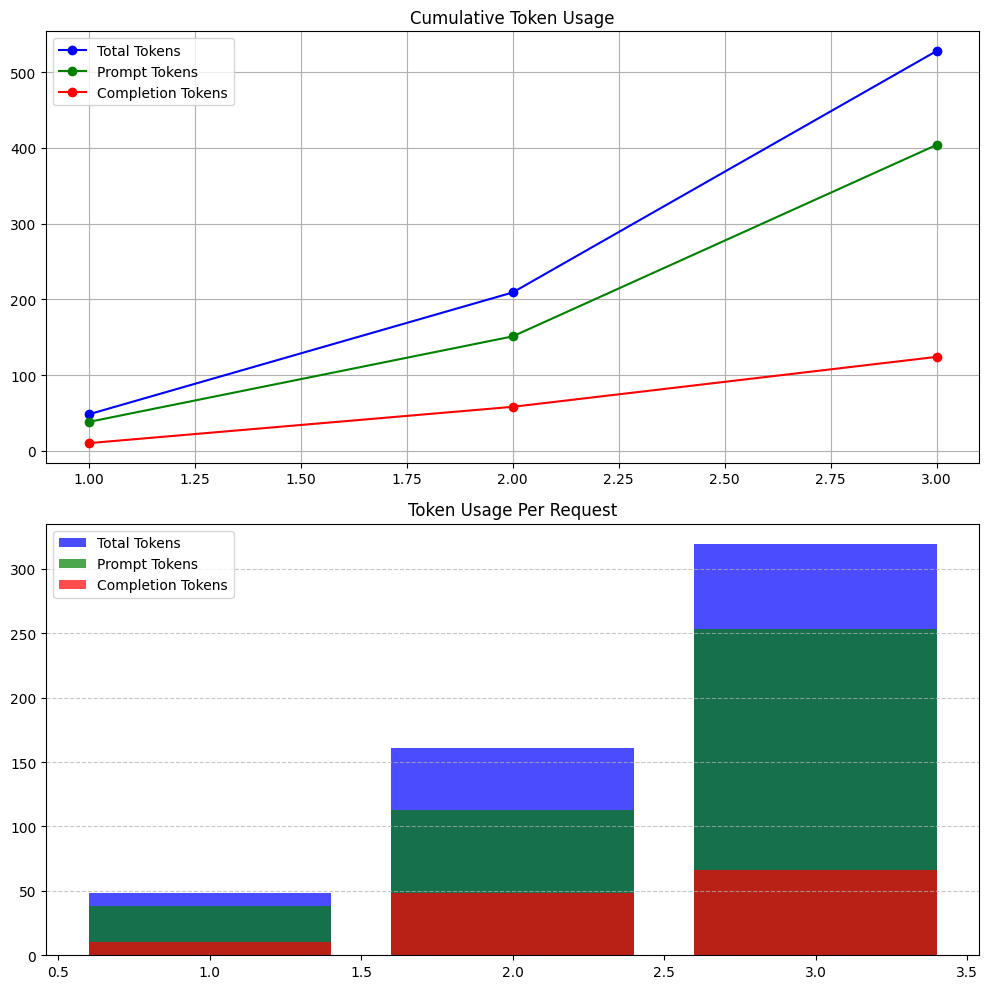

In [4]:
# Step 2: View token usage before restoring
chat_manager.show_usage_plots()

In [5]:
# Step 3: Restore an earlier version (without resetting token tracking)
chat_manager.restore_chat_version(0)

✅ Successfully restored to Version 0. Token tracking continues.


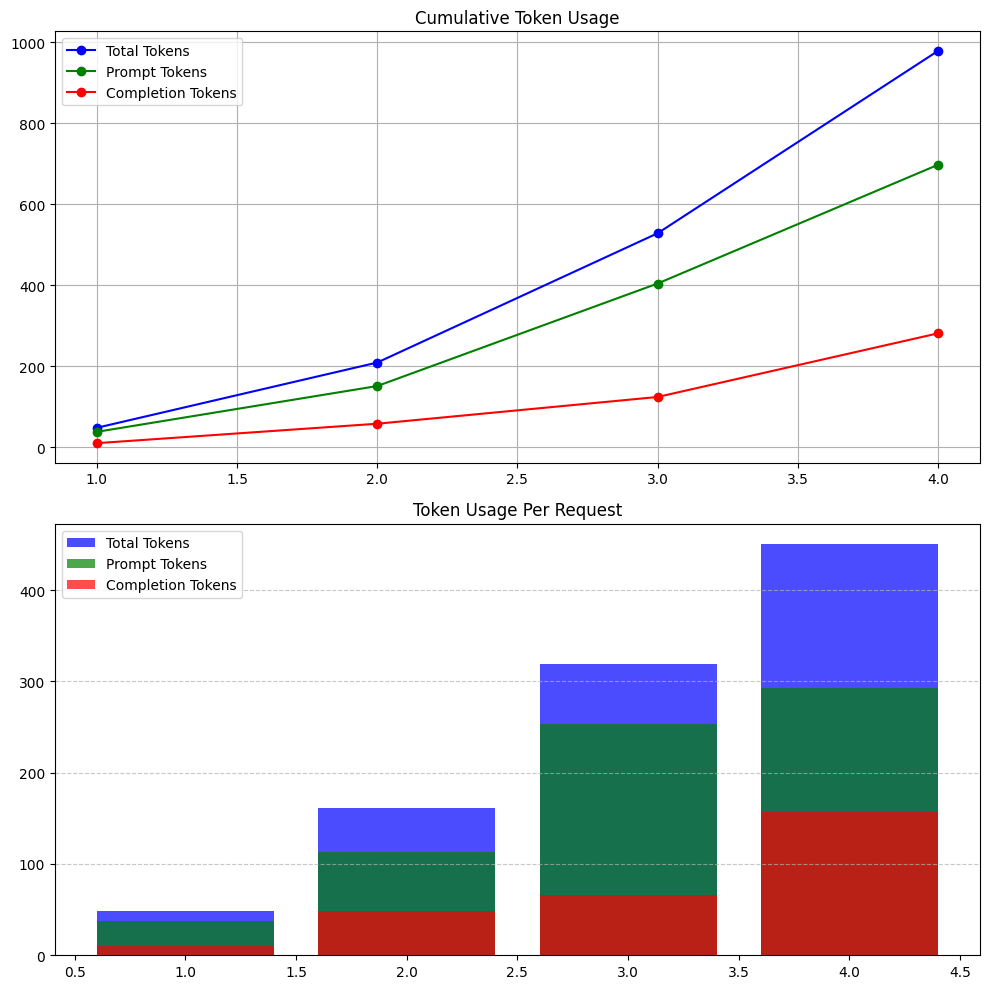

In [6]:
# Step 4: Send a new request and check token usage again
chat_manager.process_user_input("What is AI?")
chat_manager.show_usage_plots()

In [7]:
chat_manager.show_chat_versions()


📜 Chat Versions:
Version 0: 2025-03-26 06:55:25
Version 1: 2025-03-26 06:55:27
Version 2: 2025-03-26 06:55:28
Version 3: 2025-03-26 06:55:45 (In Use) 🔵


In [8]:
# Step 3: Restore an earlier version (without resetting token tracking)
chat_manager.restore_chat_version(0)

✅ Successfully restored to Version 0. Token tracking continues.


In [9]:
# Step 3: Show messages in the latest version
chat_manager.show_version_messages(chat_manager.current_version)


🗂️ Messages in Version 0:


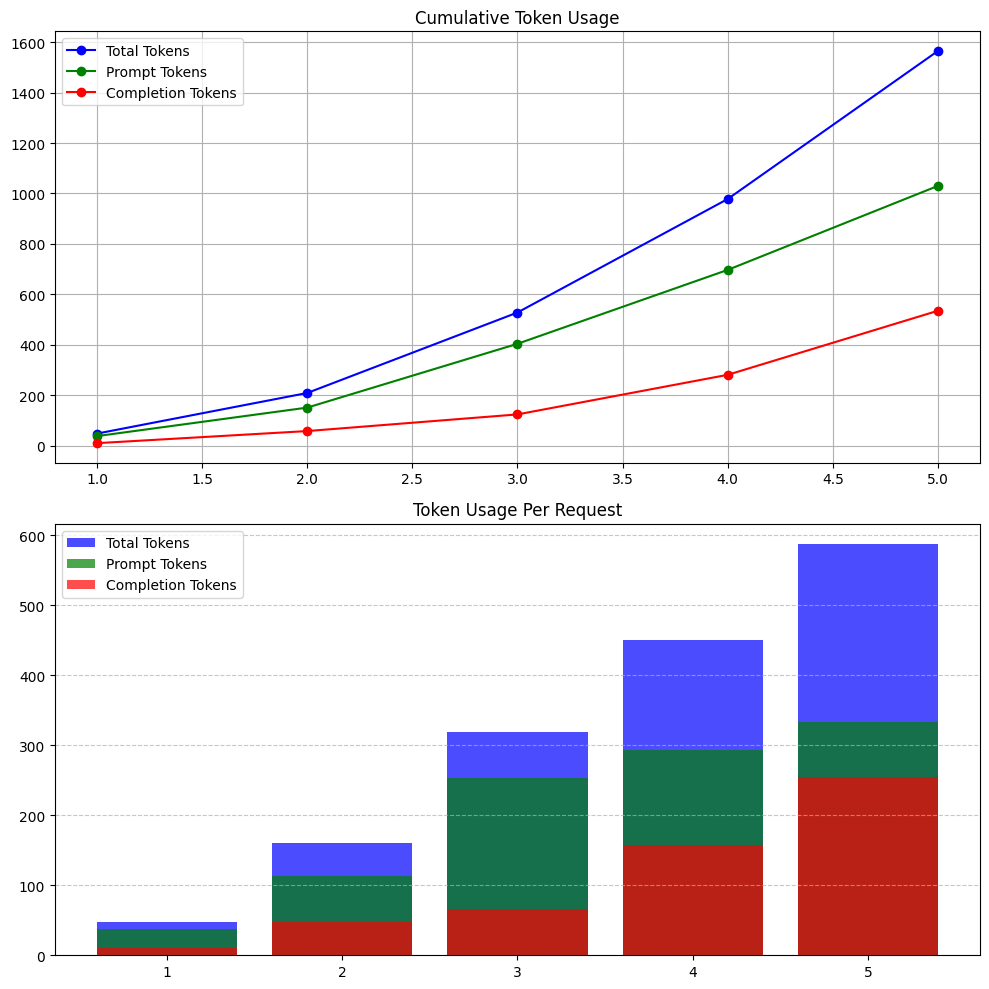

In [10]:
# Step 4: Send a new request and check token usage again
chat_manager.process_user_input("What is AI?")
chat_manager.show_usage_plots()

In [11]:
# Step 3: Show messages in the latest version
chat_manager.show_version_messages(chat_manager.current_version)


🗂️ Messages in Version 4:


In [12]:
chat_manager.show_chat_versions()


📜 Chat Versions:
Version 0: 2025-03-26 06:55:25
Version 1: 2025-03-26 06:55:27
Version 2: 2025-03-26 06:55:28
Version 3: 2025-03-26 06:55:45
Version 4: 2025-03-26 07:06:46 (In Use) 🔵


In [13]:
chat_manager.show_version_messages(chat_manager.current_version)


🗂️ Messages in Version 4:


In [14]:
chat_manager.show_version_messages(3)


🗂️ Messages in Version 3:
